## Lakshman Kumar S

# Part A - 30 Marks

• **DOMAIN**: Telecom

• **CONTEXT**: A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all relevant customer data and develop focused customer retention programs.

• **DATA DESCRIPTION**: Each row represents a customer, each column contains customer’s attributes described on the column Metadata. Thedata set includes information about:

• Customers who left within the last month – the column is called Churn

• Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

• Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

• Demographic info about customers – gender, age range, and if they have partners and dependents

• **PROJECT OBJECTIVE**: To Build a model that will help to identify the potential customers who have a higher probability to churn. This helps the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategizing customer retention.


## STEPS AND TASK [30 Marks]:

### 1. Data Understanding & Exploration: [5 Marks]


In [1]:
# Basic packages
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy import stats; from scipy.stats import zscore, norm, randint
import matplotlib.style as style; style.use('fivethirtyeight')
import plotly.express as px
%matplotlib inline


# Modelling - LR, KNN, NB, Metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, r2_score, mean_squared_error, mean_squared_log_error, make_scorer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.metrics import make_scorer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
import pickle
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

# methods and classes for evaluation
from sklearn import metrics
from math import sqrt
from sklearn.model_selection import cross_validate
import time

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

# Visualize Tree
from sklearn.tree import export_graphviz
from IPython.display import Image
from os import system

# Display settings
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000

random_state = 42
np.random.seed(random_state)

#### A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable. [1 Mark]

In [2]:
TelcomCust_1 = pd.read_csv('TelcomCustomer-Churn_1.csv')
TelcomCust_1.head(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  
0  No phone service             DSL             No  
1                No             DSL            Yes  
2                No             DSL            Yes  
3  No phone service             DSL            Yes  
4                No     Fiber optic             No

In [3]:
row, column = TelcomCust_1.shape
print('The dataset contains', row, 'rows and', column, 'columns')

The dataset contains 7043 rows and 10 columns



#### B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable. [1 Mark]


In [4]:
TelcomCust_2 = pd.read_csv('TelcomCustomer-Churn_2.csv')
TelcomCust_2.head(5)

customerID OnlineBackup DeviceProtection TechSupport StreamingTV  \
0  7590-VHVEG          Yes               No          No          No   
1  5575-GNVDE           No              Yes          No          No   
2  3668-QPYBK          Yes               No          No          No   
3  7795-CFOCW           No              Yes         Yes          No   
4  9237-HQITU           No               No          No          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0              No  Month-to-month              Yes           Electronic check   
1              No        One year               No               Mailed check   
2              No  Month-to-month              Yes               Mailed check   
3              No        One year               No  Bank transfer (automatic)   
4              No  Month-to-month              Yes           Electronic check   

   MonthlyCharges TotalCharges Churn  
0           29.85        29.85    No  
1           56.95       1889.5    No  
2           53.85       108.15   Yes  
3           42.30      1840.75    No  
4           70.70       151.65   Yes

In [5]:
row, column = TelcomCust_2.shape
print('The dataset contains', row, 'rows and', column, 'columns')

The dataset contains 7043 rows and 12 columns


#### C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame [2 Mark]


In [6]:
TelcomCust = TelcomCust_1.merge(TelcomCust_2,how='inner', on = 'customerID')
TelcomCust.head(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [7]:
TelcomCust['TotalCharges'].replace(' ',np.NaN,inplace=True)

In [8]:
TelcomCust.to_csv('TelcomCust.csv',index=False)

In [9]:
row, column = TelcomCust.shape
print('The dataset contains', row, 'rows and', column, 'columns')

The dataset contains 7043 rows and 21 columns


#### D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python. [1 Marks]

In [10]:
TelcomCust_1_col = TelcomCust_1.columns
TelcomCust_2_col = TelcomCust_2.columns
TelcomCust_append = set(np.append(TelcomCust_1_col,TelcomCust_2_col))
TelcomCust_col = set(TelcomCust.columns)

In [11]:
if (TelcomCust_col == TelcomCust_append):
    print('All columns are incorporated in merged DataFrame')
else:
    print('All columns are not incorporated in merged DataFrame')

All columns are incorporated in merged DataFrame


### 2. Data Cleaning & Analysis: [5 Marks]


#### A. Impute missing/unexpected values in the DataFrame. [2 Marks]


In [12]:
TelcomCust['TotalCharges'].replace(' ',np.NaN,inplace=True)

In [13]:
TelcomCust['TotalCharges'].fillna(TelcomCust['TotalCharges'].median(),inplace=True)

In [14]:
print('Missing values:\n', TelcomCust.isnull().sum())

Missing values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


#### B. Make sure all the variables with continuous values are of ‘Float’ type. [2 Marks]
[For Example: MonthlyCharges, TotalCharges]


In [15]:
TelcomCust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
TelcomCust = TelcomCust.astype({"TotalCharges":'float64'})

In [17]:
TelcomCust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

#### C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart. [4 Marks]


In [18]:
print('The data type of each attribute after conversion into categorical variables: \n')
for cols in TelcomCust.columns: # Loop through all columns in the dataframe
    if TelcomCust[cols].dtype == 'object' and cols != 'customerID':
        TelcomCust[cols] = pd.Categorical(TelcomCust[cols])
TelcomCust.dtypes

The data type of each attribute after conversion into categorical variables: 



customerID            object
gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

In [19]:
#Function to plot Pie-Charts for all categorical variables in the dataframe
def pie_charts_for_CategoricalVar(df_pie,m):
    '''Takes in a dataframe(df_pie) and plots pie charts for all categorical columns. m = number of columns required in grid'''
    
    #get all the column names in the dataframe
    a = []
    for i in df_pie:
        a.append(i)
    
    #isolate the categorical variable names from a to b
    b = []
    for i in a:
        if (df_pie[i].dtype.name) == 'category':
            b.append(i)
        
    plt.figure(figsize=(30, 20))
    plt.subplots_adjust(hspace=0.2)
    plt.suptitle("Pie-Charts for Categorical Variables in the dataframe", fontsize=25, y=0.95)
    
    # number of columns, as inputted while calling the function
    ncols = m
    # calculate number of rows
    nrows = len(b) // ncols + (len(b) % ncols > 0)
    
    # loop through the length of 'b' and keep track of index
    for n, i in enumerate(b):
        # add a new subplot iteratively using nrows and ncols
        ax = plt.subplot(nrows, ncols, n + 1)

        # filter df and plot 'i' on the new subplot axis
        df_pie.groupby(i).size().plot(kind='pie', autopct='%.2f%%',ax=ax)
        
        ax.set_title(i.upper())
        ax.set_xlabel("")
        ax.set_ylabel("")
    plt.show()

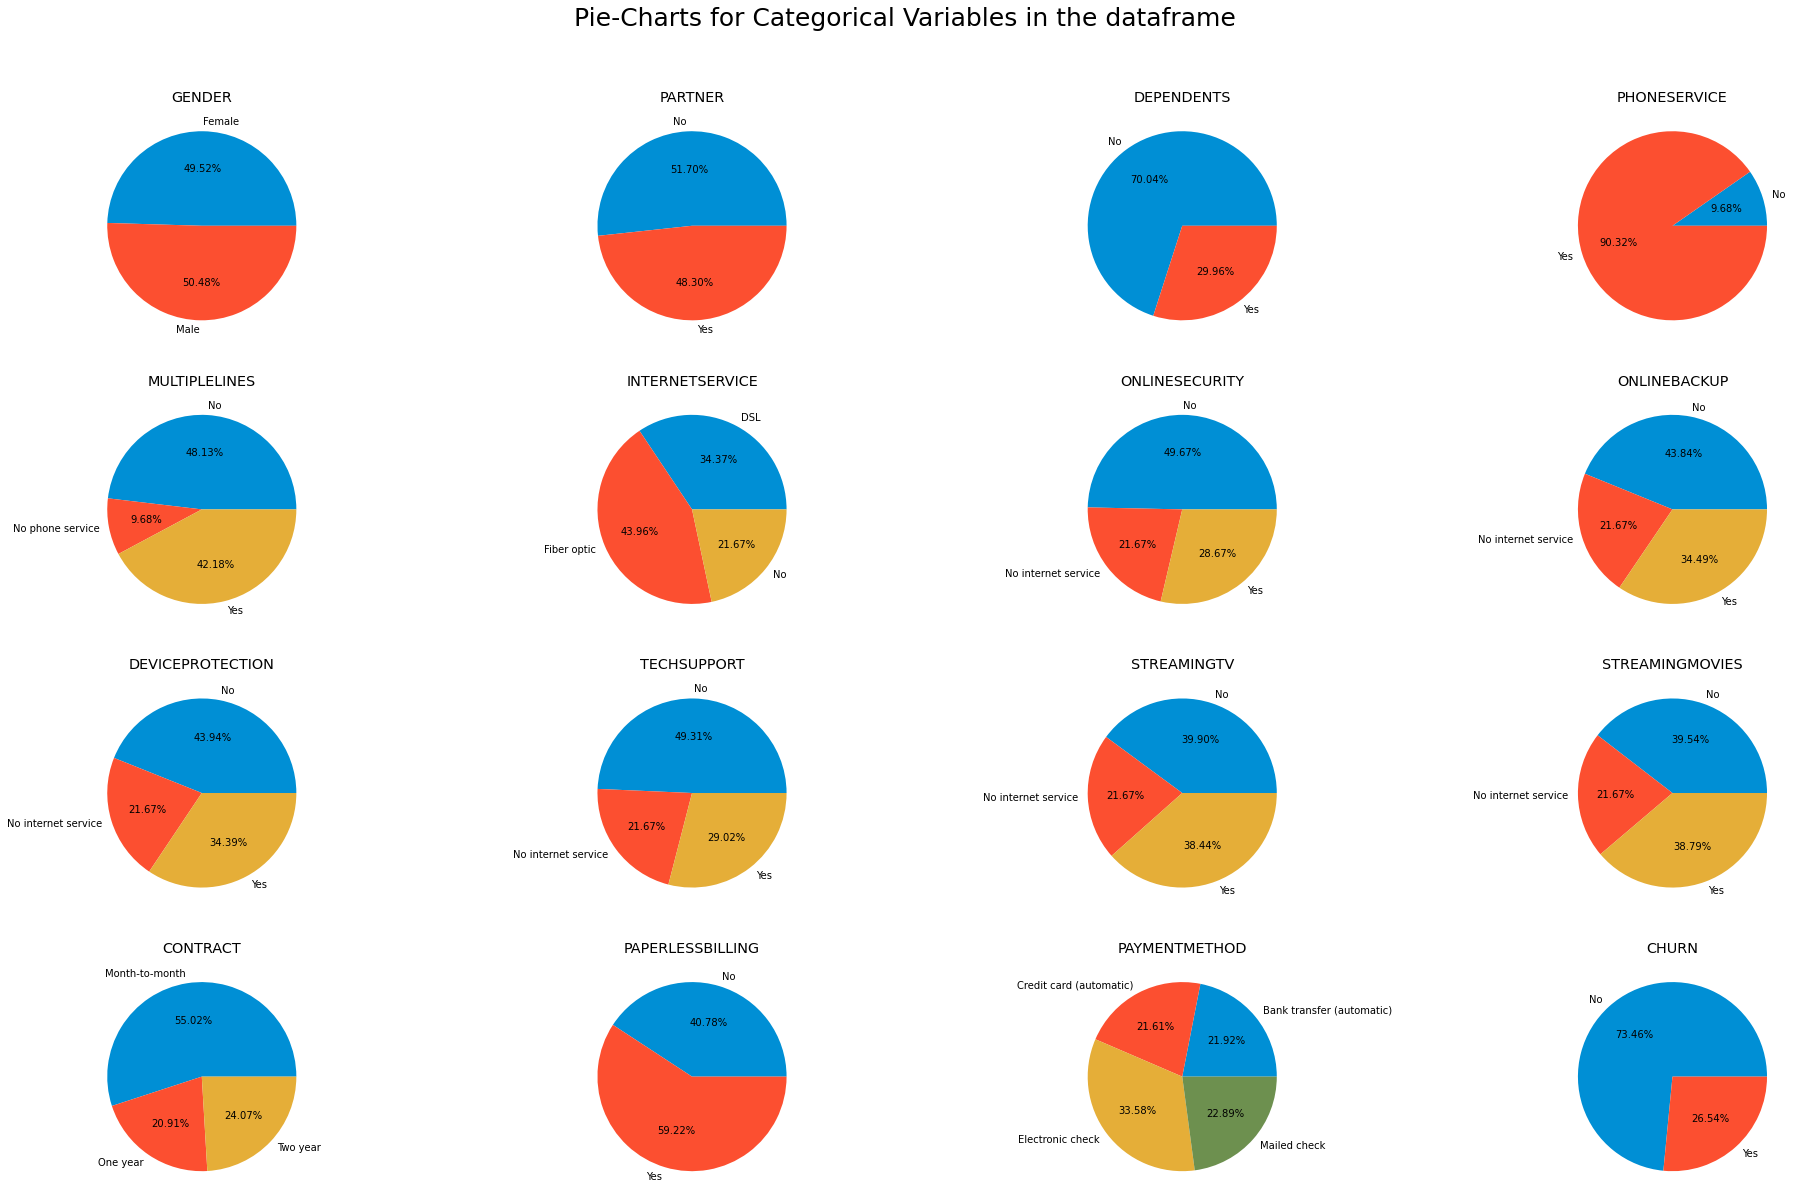

In [20]:
#calling the function to plot pie-charts for categorical variable

pie_charts_for_CategoricalVar(TelcomCust,4)   #dataframe, no. of cols in the grid

#### D. Share insights for Q2.c. [2 Marks]


From the pie chart plot we could observe that,
1. In total, there are 16 categorical variables
2. Of which, for 6 variables there are only two categories either "yes" or "no"
3. "InternetService","Contract","PaymentMethod" are one hot columns, as each value is independant of each other and can't be ranked.
4. In the dataset, 50.48% are Male and remaining 48.52% are Females
5. About 48.3% customers have Partners and 51.7% do not have Partners
6. 29.96% of Customers have dependants, whereas 70.4% do not have any Dependants
7. A whoping percent of 90.32% customers have Phoneservice and only 9.68% don't have a phoneservice
8. Of the 90.32% customers with phoneservice, 42.18% has multiplelines
9. 78.33% of customers have internetservice, of which 34.37% are DSL and remaining 43.96% are Fiberoptics
10. Only 28.67% of customers having internetservice has Onlinesecurity
11. 34.49% of customers having internetservice has Onlinebackup
12. And, 34.39% of customers having internetservice has DeviceProtection
13. Only, 29.02% of customers having internetservice has Techsupport
14. Considering the customers having internetservice 38.44% has StreamingTV and 38.79% has StreamingMovies
15. There are 3 categories in Contract, Month-to-Month with 55.02% customers, One year with 20.91% customers and Two year with 24.07%
16. About 59.22% of customers have opted for paperless billing
17. In total there are 4 ways of payment, namely - Credit card (automatic) - 21.61% customers, bank transfer (automatic) - 21.92% customers, Mailed check - 22.89% customers and Electronic check - 33.58% customers
18. Finally, in the given data set only 26.54% customers churn and remaining 73.46% cutomers did not churn. This clearly shows that our **dataset is imbalanced** and we need to either oversample or undersample to make them balanced.

These are the insights we can infer from the pie charts and these insights are very useful to proceed with encoding categorical features and with the modelling part.

#### E. Encode all the appropriate Categorical features with the best suitable approach. [2 Marks]


In [21]:
print(TelcomCust.gender.value_counts())
print(TelcomCust.Partner.value_counts())
print(TelcomCust.Dependents.value_counts())
print(TelcomCust.PhoneService.value_counts())
print(TelcomCust.MultipleLines.value_counts())
print(TelcomCust.InternetService.value_counts())
print(TelcomCust.OnlineSecurity.value_counts())
print(TelcomCust.OnlineBackup.value_counts())
print(TelcomCust.DeviceProtection.value_counts())
print(TelcomCust.TechSupport.value_counts())
print(TelcomCust.StreamingTV.value_counts())
print(TelcomCust.StreamingMovies.value_counts())
print(TelcomCust.Contract.value_counts())
print(TelcomCust.PaperlessBilling.value_counts())
print(TelcomCust.PaymentMethod.value_counts())
print(TelcomCust.Churn.value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV

In [22]:
print('Categorical Columns: \n{}'.format(list(TelcomCust.select_dtypes('category').columns)))
print('\nNumerical Columns: \n{}'.format(list(TelcomCust.select_dtypes(exclude = 'category').columns)))

Categorical Columns: 
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Numerical Columns: 
['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [23]:
TelcomCust_encoded = TelcomCust.copy(deep = True)

In [24]:
TelcomCust_encoded.dtypes

customerID            object
gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

In [25]:
replaceStruct = {
                "gender":     {"Male": 0, "Female": 1 } ,
                "Partner":     {"No": 0, "Yes": 1 } ,
                "Dependents":     {"No": 0, "Yes": 1 },                 
                "PhoneService":     {"No": 0, "Yes": 1 }      ,
                "MultipleLines":     {"No": 0, "Yes": 1, "No phone service":-1 }     ,
                "OnlineSecurity":     {"No": 0, "Yes": 1, "No internet service":-1 }  ,               
                "OnlineBackup":     {"No": 0, "Yes": 1, "No internet service":-1 }     , 
                "DeviceProtection":     {"No": 0, "Yes": 1, "No internet service":-1 }  ,   
                "TechSupport":     {"No": 0, "Yes": 1, "No internet service":-1 } ,
                "StreamingTV":     {"No": 0, "Yes": 1, "No internet service":-1 }  ,               
                "StreamingMovies":     {"No": 0, "Yes": 1, "No internet service":-1 }      ,
                "PaperlessBilling":     {"No": 0, "Yes": 1 }     ,
                "Churn":     {"No": 0, "Yes": 1 } 
                    }
oneHotCols=["InternetService","Contract","PaymentMethod"]


In [26]:
TelcomCust_encoded=TelcomCust_encoded.replace(replaceStruct)
TelcomCust_encoded=pd.get_dummies(TelcomCust_encoded, columns=oneHotCols)
TelcomCust_encoded.head(10)

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       1              0        1           0       1   
1  5575-GNVDE       0              0        0           0      34   
2  3668-QPYBK       0              0        0           0       2   
3  7795-CFOCW       0              0        0           0      45   
4  9237-HQITU       1              0        0           0       2   
5  9305-CDSKC       1              0        0           0       8   
6  1452-KIOVK       0              0        0           1      22   
7  6713-OKOMC       1              0        0           0      10   
8  7892-POOKP       1              0        1           0      28   
9  6388-TABGU       0              0        0           1      62   

   PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  \
0             0             -1               0             1   
1             1              0               1             0   
2             1              0               1             1   
3             0             -1               1             0   
4             1              0               0             0   
5             1              1               0             0   
6             1              1               0             1   
7             0             -1               1             0   
8             1              1               0             0   
9             1              0               1             1   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                 0            0            0                0   
1                 1            0            0                0   
2                 0            0            0                0   
3                 1            1            0                0   
4                 0            0            0                0   
5                 1            0            1                1   
6                 0            0            1                0   
7                 0            0            0                0   
8                 1            1            1                1   
9                 0            0            0                0   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  InternetService_DSL  \
0                 1           29.85         29.85      0                    1   
1                 0           56.95       1889.50      0                    1   
2                 1           53.85        108.15      1                    1   
3                 0           42.30       1840.75      0                    1   
4                 1           70.70        151.65      1                    0   
5                 1           99.65        820.50      1                    0   
6                 1           89.10       1949.40      0                    0   
7                 0           29.75        301.90      0                    1   
8                 1          104.80       3046.05      1                    0   
9                 0           56.15       3487.95      0                    1   

   InternetService_Fiber optic  InternetService_No  Contract_Month-to-month  \
0                            0                   0                        1   
1                            0                   0                        0   
2                            0                   0                        1   
3                            0                   0                        0   
4                            1                   0                        1   
5                            1                   0                        1   
6                            1                   0                        1   
7                            0                   0                        1   
8                            1                   0                        1   
9                            0                   0                        0   

   Contract_One year  Contract_Two year  \
0     

In [27]:
TelcomCust_encoded.dtypes

customerID                                  object
gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [28]:
TelcomCust_encoded = TelcomCust_encoded.astype({"gender":'category', "Partner":'category', "Dependents":'category', 
                                                "PhoneService":'category', "MultipleLines":'category', 
                                                "OnlineSecurity":'category', "OnlineBackup":'category', "DeviceProtection":'category', 
                                                "TechSupport":'category', "StreamingTV":'category', "StreamingMovies":'category', 
                                                 "PaperlessBilling":'category', "Churn":'category'})

In [29]:
print('The data type of each attribute after conversion into categorical variables: \n')
for cols in TelcomCust_encoded.columns: # Loop through all columns in the dataframe
    if TelcomCust_encoded[cols].dtype == 'uint8':
        TelcomCust_encoded[cols] = pd.Categorical(TelcomCust_encoded[cols])
TelcomCust_encoded.dtypes

The data type of each attribute after conversion into categorical variables: 



customerID                                   object
gender                                     category
SeniorCitizen                                 int64
Partner                                    category
Dependents                                 category
tenure                                        int64
PhoneService                               category
MultipleLines                              category
OnlineSecurity                             category
OnlineBackup                               category
DeviceProtection                           category
TechSupport                                category
StreamingTV                                category
StreamingMovies                            category
PaperlessBilling                           category
MonthlyCharges                              float64
TotalCharges                                float64
Churn                                      category
InternetService_DSL                        category
InternetServ

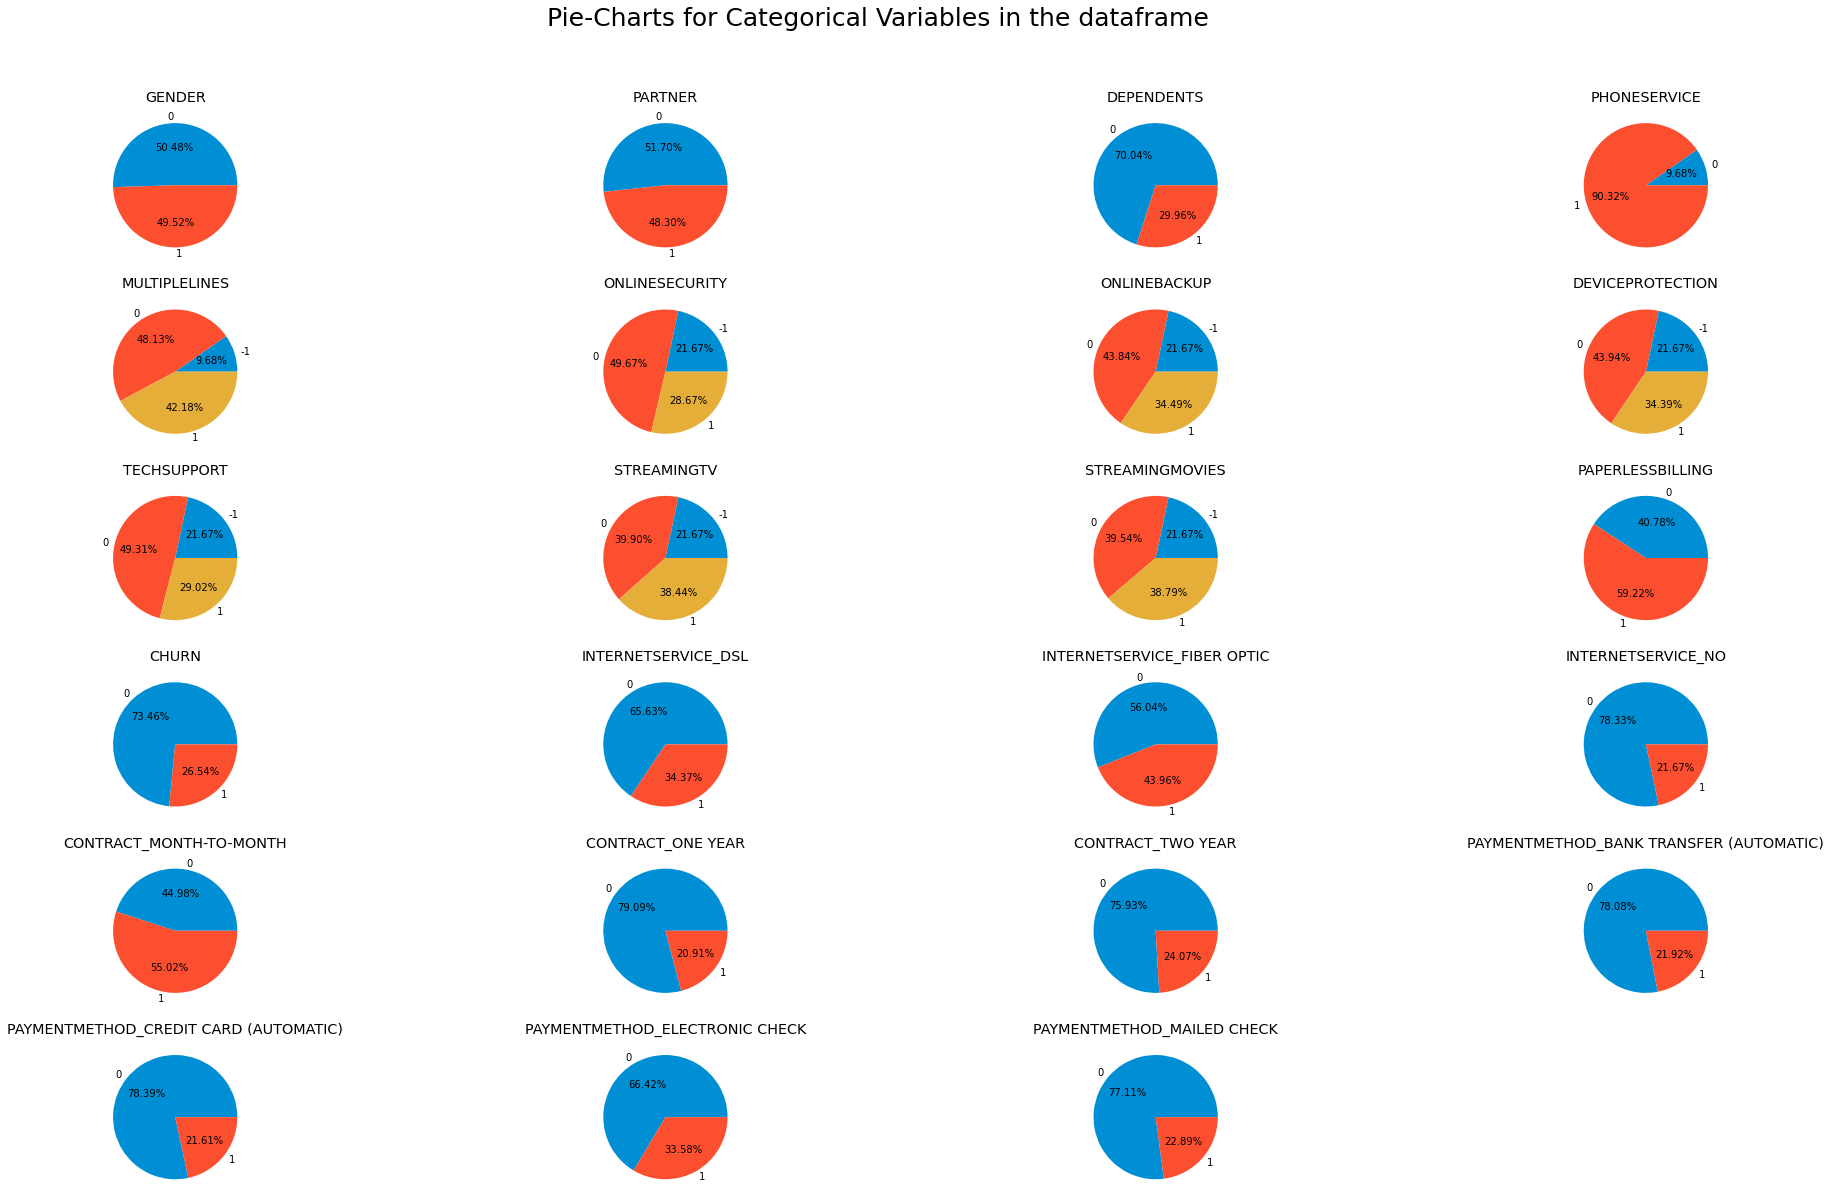

In [30]:
#calling the function to plot pie-charts for categorical variable

pie_charts_for_CategoricalVar(TelcomCust_encoded,4)   #dataframe, no. of cols in the grid

#### F. Split the data into 80% train and 20% test. [1 Marks]


In [31]:
TelcomCust_encoded = TelcomCust_encoded.drop("customerID", axis=1)
X = TelcomCust_encoded.drop("Churn", axis=1)
y = TelcomCust_encoded['Churn']

In [32]:
from sklearn.preprocessing import RobustScaler
# Applying RobustScaler to make it less prone to outliers
features = X.columns
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = features)
from scipy.stats import zscore
# Scaling the independent variables
Xs = X.apply(zscore)

display(X.shape, Xs.shape, y.shape)

(7043, 26)

(7043, 26)

(7043,)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=.20, random_state=1)

In [34]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(TelcomCust_encoded.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(TelcomCust_encoded.index)) * 100))

79.99% data is in training set
20.01% data is in test set


#### G. Normalize/Standardize the data with the best suitable approach. [2 Marks]

In [35]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [36]:
display(y.value_counts(), y.value_counts(normalize = True)*100)

0    5174
1    1869
Name: Churn, dtype: int64

0    73.463013
1    26.536987
Name: Churn, dtype: float64

<AxesSubplot:>

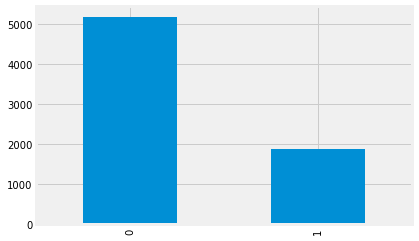

In [37]:
y.value_counts().plot(kind='bar')

In [38]:
Class_0 = y[y == 0].count()
Class_1 = y[y == 1].count()
Total_C = y.count()

In [39]:
Class_0_p = Class_0 / Total_C * 100
print("Chrun = 0 in percent is ", Class_0_p)
Class_1_p = Class_1/Total_C * 100
print("Chrun = 1 in percent is ", Class_1_p)

Chrun = 0 in percent is  73.4630129206304
Chrun = 1 in percent is  26.536987079369588


In [40]:
counter = Counter(y)
print(counter)

# define pipeline
over = SMOTE(sampling_strategy=1)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
Xs, y = pipeline.fit_resample(Xs, y)

counter = Counter(y)
print(counter)

Counter({0: 5174, 1: 1869})
Counter({0: 5174, 1: 5174})


<AxesSubplot:>

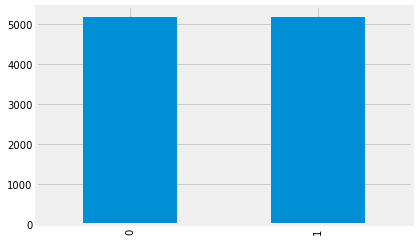

In [41]:
y.value_counts().plot(kind='bar')

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=.20, random_state=1)

In [43]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(Xs.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(Xs.index)) * 100))

80.00% data is in training set
20.00% data is in test set


### 3. Model building and Improvement: [10 Marks]


#### A. Train a model using XGBoost. Also print best performing parameters along with train and test performance. [5 Marks]


Accuracy Score of Training Data:  0.9516791495530321

Accuracy Score of Test Data: 0.8497584541062801

Classification Report of Gradient Boosting Classification Model:
                precision    recall  f1-score   support

           0       0.85      0.85      0.85      1049
           1       0.85      0.85      0.85      1021

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070


Mean Absolute Error of Gradient Boosting Classification Model:
 0.1502415458937198

Confusion Matrix of Gradient Boosting Classification Model:
 [[890 159]
 [152 869]]

R2 score: 0.3989238386635654


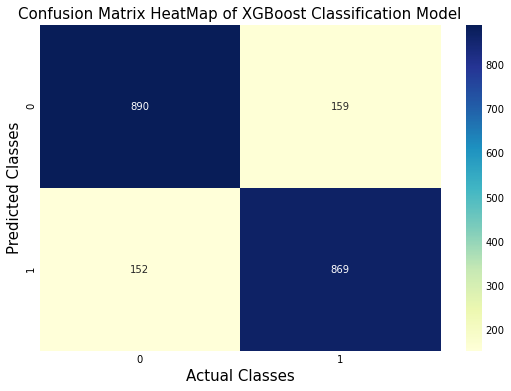

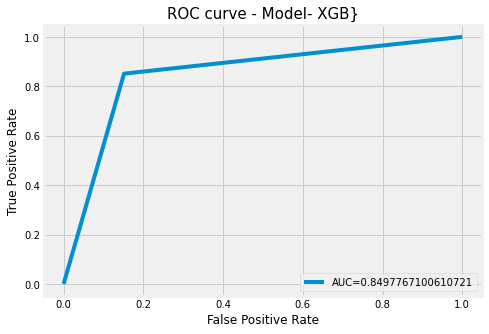

In [44]:
XGB = XGBClassifier()
XGB = XGB.fit(X_train, y_train, eval_metric='rmse')
y_predictXGB = XGB.predict(X_test)

modeltrXGB_score = XGB.score(X_train, y_train)
print('Accuracy Score of Training Data: ', modeltrXGB_score)


cfm_XGB = confusion_matrix(y_test, y_predictXGB)
from sklearn.metrics import r2_score

# evaluate accuracy
modelXGB_score = accuracy_score(y_test, y_predictXGB)
print('\nAccuracy Score of Test Data:', modelXGB_score)
print('\nClassification Report of Gradient Boosting Classification Model:\n ', classification_report(y_test, y_predictXGB))
print('\nMean Absolute Error of Gradient Boosting Classification Model:\n', mean_absolute_error(y_test, y_predictXGB))
print('\nConfusion Matrix of Gradient Boosting Classification Model:\n', cfm_XGB)
print("\nR2 score:", r2_score(y_test,y_predictXGB, multioutput='variance_weighted'))

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cfm_XGB, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of XGBoost Classification Model', fontsize = 15)

# Calculate the AUC
fpr, tpr, _ = roc_curve(y_test,  y_predictXGB)
auc_obt = roc_auc_score(y_test, y_predictXGB)

#create ROC curve

plt.figure(figsize = (7,5))
plt.plot(fpr,tpr,label="AUC="+str(auc_obt))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve - Model- XGB}', fontsize = 15)
plt.legend(loc=4)
plt.show()

In [45]:
precision_XGB, recall_XGB, f1_score_XGB, support = precision_recall_fscore_support(y_test, y_predictXGB, average = 'macro')
print('Precision Score :', '%0.2f' % precision_XGB)
print('Recall Score :', '%0.2f' % recall_XGB)
print('F1-Score :', '%0.2f' % f1_score_XGB)
print('Accuracy Score :','%0.2f' % modelXGB_score)

Precision Score : 0.85
Recall Score : 0.85
F1-Score : 0.85
Accuracy Score : 0.85


                                         Feature Importance
InternetService_No                                 0.000000
MonthlyCharges                                     0.006121
TotalCharges                                       0.006164
PaymentMethod_Bank transfer (automatic)            0.006526
SeniorCitizen                                      0.006926
PaymentMethod_Mailed check                         0.007170
InternetService_DSL                                0.008276
PaymentMethod_Credit card (automatic)              0.008689
Partner                                            0.009649
Dependents                                         0.011851
gender                                             0.012078
PaymentMethod_Electronic check                     0.013249
tenure                                             0.013627
MultipleLines                                      0.015205
Contract_Two year                                  0.015429
PaperlessBilling                        

Text(0.5, 1.0, 'Determining Feature Improtance with XGBoost Classifier')

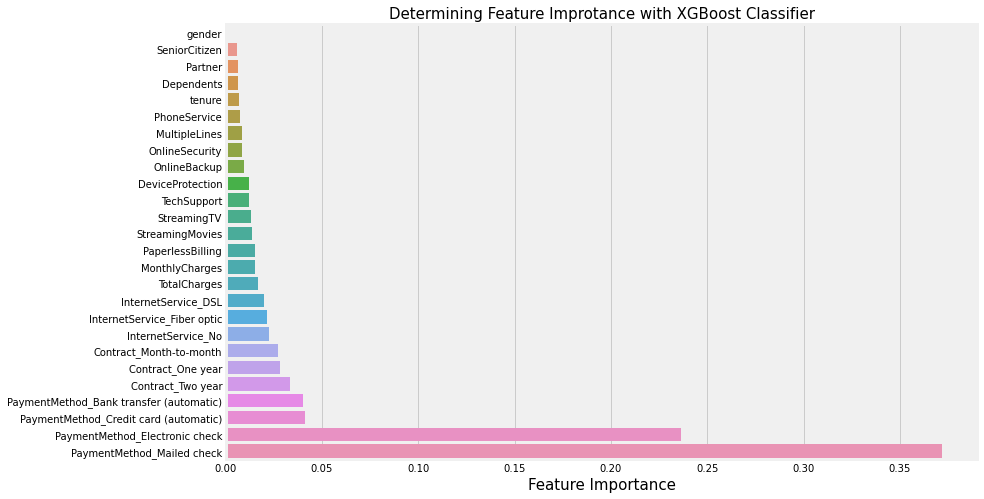

In [46]:
FI_XGB = pd.DataFrame(XGB.feature_importances_, columns = ['Feature Importance'], index = X_train.columns)
FI_xgb = FI_XGB.sort_values(by = 'Feature Importance', ascending = True)
print(FI_xgb)

plt.figure(figsize = (12, 8))
sns.barplot(x = FI_xgb['Feature Importance'], y = X_train.columns)
plt.xlabel('Feature Importance', fontsize = 15)
plt.title('Determining Feature Improtance with XGBoost Classifier', fontsize = 15)

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from random import randint
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

## Hyper Parameter Optimization
n_estimators = [20, 40, 60, 80, 100]
max_depth = [3, 6, 9]
learning_rate= [0.07, 0.09, 0.11, 0.13]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight
    }

Classifier = XGBClassifier()

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=Classifier,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cv.fit(X_train,y_train, eval_metric='rmse')

y_pred = random_cv.predict(X_test)

from sklearn.metrics import r2_score
print("R2 score:", r2_score(y_test,y_pred, multioutput='variance_weighted'))

random_cv.best_estimator_


Fitting 5 folds for each of 50 candidates, totalling 250 fits
R2 score: 0.4201837671995807


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.11, max_delta_step=0,
              max_depth=9, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=80, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
Classifier = random_cv.best_estimator_

Classifier.fit(X_train,y_train, eval_metric='rmse')
y_pred = Classifier.predict(X_test)

from sklearn.metrics import r2_score
print("R2 score:", r2_score(y_test,y_pred, multioutput='variance_weighted'))


R2 score: 0.4201837671995807


#### B. Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance. [5 Marks]

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
#List Hyperparameters that we want to tune.
n_estimators = [20, 40, 60, 80, 100]
max_depth = [3, 6, 9]
learning_rate= [0.07, 0.09, 0.11, 0.13]
min_child_weight=[1,2,3,4]

#Convert to dictionary
hyperparameters = dict(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, min_child_weight=min_child_weight)

#Create new KNN object
XGB_2 = XGBClassifier()

#Use GridSearch
clf = GridSearchCV(XGB_2, hyperparameters,
            cv=5,             scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True)

#Fit the model
best_model = clf.fit(X_train,y_train, eval_metric='rmse')

#Print The value of best Hyperparameters
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best learning_rate:', best_model.best_estimator_.get_params()['learning_rate'])
print('Best min_child_weight:', best_model.best_estimator_.get_params()['min_child_weight'])


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best n_estimators: 80
Best max_depth: 9
Best learning_rate: 0.11
Best min_child_weight: 2


In [51]:

y_pred = Classifier.predict(X_test)

from sklearn.metrics import r2_score
print("R2 score:", r2_score(y_test,y_pred, multioutput='variance_weighted'))


R2 score: 0.4201837671995807


Accuracy Score of Training Data:  0.9516791495530321

Accuracy Score of Test Data: 0.855072463768116

Classification Report of Gradient Boosting Classification Model:
                precision    recall  f1-score   support

           0       0.86      0.85      0.86      1049
           1       0.85      0.86      0.85      1021

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070


Mean Absolute Error of Gradient Boosting Classification Model:
 0.14492753623188406

Confusion Matrix of Gradient Boosting Classification Model:
 [[896 153]
 [147 874]]

R2 score: 0.4201837671995807


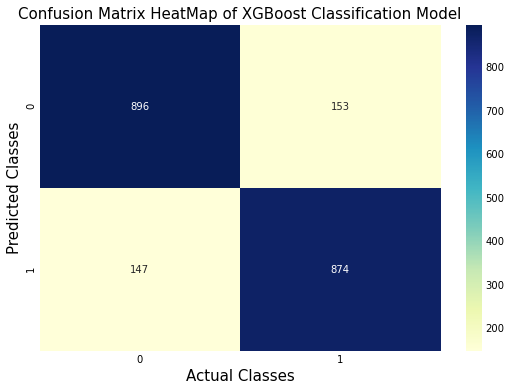

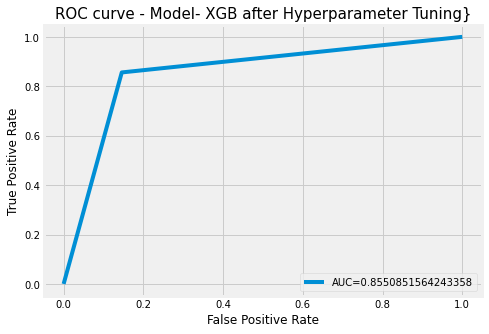

In [52]:
Classifier = best_model.best_estimator_

Classifier.fit(X_train,y_train, eval_metric='rmse')

y_predictXGB = Classifier.predict(X_test)

modeltrXGB_score_tune = Classifier.score(X_train, y_train)
print('Accuracy Score of Training Data: ', modeltrXGB_score)


cfm_XGB = confusion_matrix(y_test, y_predictXGB)
from sklearn.metrics import r2_score

# evaluate accuracy
modelXGB_score_tune = accuracy_score(y_test, y_predictXGB)
print('\nAccuracy Score of Test Data:', modelXGB_score_tune)
print('\nClassification Report of Gradient Boosting Classification Model:\n ', classification_report(y_test, y_predictXGB))
print('\nMean Absolute Error of Gradient Boosting Classification Model:\n', mean_absolute_error(y_test, y_predictXGB))
print('\nConfusion Matrix of Gradient Boosting Classification Model:\n', cfm_XGB)
print("\nR2 score:", r2_score(y_test,y_predictXGB, multioutput='variance_weighted'))

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cfm_XGB, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of XGBoost Classification Model', fontsize = 15)


# Calculate the AUC
fpr, tpr, _ = roc_curve(y_test,  y_predictXGB)
auc_obt = roc_auc_score(y_test, y_predictXGB)

#create ROC curve

plt.figure(figsize = (7,5))
plt.plot(fpr,tpr,label="AUC="+str(auc_obt))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve - Model- XGB after Hyperparameter Tuning}', fontsize = 15)
plt.legend(loc=4)
plt.show()

In [53]:
precision_XGB_tune, recall_XGB_tune, f1_score_XGB_tune, support = precision_recall_fscore_support(y_test, y_predictXGB, average = 'macro')
print('Precision Score after Hyperparameter tuning :', '%0.2f' % precision_XGB_tune)
print('Recall Score after Hyperparameter tuning :', '%0.2f' % recall_XGB_tune)
print('F1-Score after Hyperparameter tuning :', '%0.2f' % f1_score_XGB_tune)
print('Accuracy Score after Hyperparameter tuning :','%0.2f' % modelXGB_score_tune)

Precision Score after Hyperparameter tuning : 0.86
Recall Score after Hyperparameter tuning : 0.86
F1-Score after Hyperparameter tuning : 0.86
Accuracy Score after Hyperparameter tuning : 0.86


                                         Feature Importance
InternetService_No                                 0.000000
MonthlyCharges                                     0.006121
TotalCharges                                       0.006164
PaymentMethod_Bank transfer (automatic)            0.006526
SeniorCitizen                                      0.006926
PaymentMethod_Mailed check                         0.007170
InternetService_DSL                                0.008276
PaymentMethod_Credit card (automatic)              0.008689
Partner                                            0.009649
Dependents                                         0.011851
gender                                             0.012078
PaymentMethod_Electronic check                     0.013249
tenure                                             0.013627
MultipleLines                                      0.015205
Contract_Two year                                  0.015429
PaperlessBilling                        

Text(0.5, 1.0, 'Determining Feature Improtance with XGBoost Classifier')

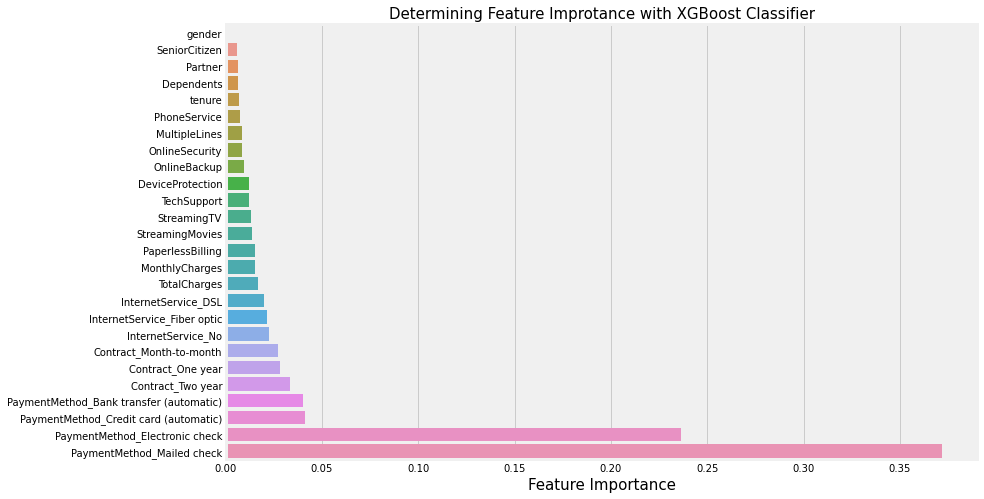

In [54]:
FI_XGB = pd.DataFrame(XGB.feature_importances_, columns = ['Feature Importance'], index = X_train.columns)
FI_xgb = FI_XGB.sort_values(by = 'Feature Importance', ascending = True)
print(FI_xgb)

plt.figure(figsize = (12, 8))
sns.barplot(x = FI_xgb['Feature Importance'], y = X_train.columns)
plt.xlabel('Feature Importance', fontsize = 15)
plt.title('Determining Feature Improtance with XGBoost Classifier', fontsize = 15)

<a id='conclusion'></a>
### Conclusion

The classification goal is to predict the potential customers who have a higher probability to churn. 

Most of the ML models works best when the number of classes are in equal proportion since they are designed to maximize accuracy and reduce error. Thus, they do not take into account the class distribution / proportion or balance of classes. In our dataset, the potential customers who have a higher probability to churn (chrun 'yes' i.e. 1) is 26.5% whereas those about 73.5% of the customers didn't churn (Chrun 'no' i.e. 0).

In this cases, important performance measures such as precision, recall, and f1-score would be helpful. We can also calculate this metrics for the minority, positive, class.

* **Precision**: When it predicts the positive result, how often is it correct? i.e. limit the number of false positives.
* **Recall**: When it is actually the positive result, how often does it predict correctly? i.e. limit the number of false negatives.
* **f1-score**: Harmonic mean of precision and recall.

The confusion matrix for class 1 (Churn) would look like:

|                        | Predicted: 0 (Not Chrun) | Predicted: 1 (Churn)|
|------------------------|-----------------------------|------------------------|
|**Actual: 0 (Not Subscribed)**| True Negatives              | False Positives        |
|**Actual: 1 (Subscribed)**    | False Negatives             | True Positives         |

* **Precision would tell us cases where actually the Customer hadn't chrun but we predicted it as chrun.**
* **Recall would tell us cases where actually the Customer had chrun but we predicted it as didn't chrun.**

In our case, it would be recall that would hold more importance then precision. So <span class="mark">choosing recall particularly for class 1 and accuracy as as evaluation metric. Also important would be how is model behaving over the training and test scores across the cross validation sets.</span>

**Modeling** was sub-divided in two phases, in the first phase we applied XGB without hyperparameter tuning. In second phase applied XGB with hyperparameter tuning. Oversampling the ones with higher accuracy and better recall.

**Oversampling**, which is one of common ways to tackle the issue of imbalanced data. Over-sampling refers to various methods that aim to increase the number of instances from the underrepresented class in the data set. Out of the various methods, we chose Synthetic Minority Over-Sampling Technique (SMOTE). SMOTE’s main advantage compared to traditional random naive over-sampling is that by creating synthetic observations instead of reusing existing observations, classifier is less likely to overfit.

**In the first phase (XGB without Hyperparameter Tuning)**,
* We observed a recall of 85%
* And a better accuracy of 85% was observed in XGB without hyperparameter tuning
* <span class="mark">Oversampling both, we observed a r2 score of 0.39.
In a nutshell,
Precision Score : 0.85
Recall Score : 0.85
F1-Score : 0.85
Accuracy Score : 0.85
R2 Score : 0.39

**In the second phase (XGB with Hyperparameter Tuning)**,
* We observed a recall of 86%
* And a better accuracy of 86% was observed in XGB with hyperparameter tuning
* The best performing parameters obtained are,
Best n_estimators: 80
Best max_depth: 9
Best learning_rate: 0.11
Best min_child_weight: 2
* <span class="mark">Oversampling both, we observed a r2 score of 0.42.
In a nutshell,
Precision Score after Hyperparameter tuning : 0.86
Recall Score after Hyperparameter tuning : 0.86
F1-Score after Hyperparameter tuning : 0.86
Accuracy Score after Hyperparameter tuning : 0.86
R2 score after Hyperparameter tuning : 0.42
    
* <span class="mark">Thus after hyperparameter tuning when oversampled we obtained the best model with a recall of 86%, accuracy of 86%

    </span>

# Part B - 30 Marks

• **DOMAIN**: IT

• **CONTEXT**: The purpose is to build a machine learning workflow that will work autonomously irrespective of Data and users can save efforts involved in building workflows for each dataset.

• **PROJECT OBJECTIVE**: Build a machine learning workflow that will run autonomously with the csv file and return best performing model.

## STEPS AND TASK [30 Marks]:

#### 1. Build a simple ML workflow which will accept a single ‘.csv’ file as input and return a trained base model that can be used for predictions. You can use 1 Dataset from Part 1 (single/merged).



In [55]:
# Basic packages
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy import stats; from scipy.stats import zscore, norm, randint
import matplotlib.style as style; style.use('fivethirtyeight')
import plotly.express as px
%matplotlib inline


# Modelling - LR, KNN, NB, Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, r2_score, mean_squared_error, mean_squared_log_error, make_scorer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.metrics import make_scorer
import pickle
from sklearn import svm
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# methods and classes for evaluation
from sklearn import metrics
from math import sqrt
from sklearn.model_selection import cross_validate
import time

# Suppress warnings
import warnings; warnings.filterwarnings('ignore', message = 'old')

# Visualize Tree
from sklearn.tree import export_graphviz
from IPython.display import Image
from os import system

# Display settings
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000

random_state = 42
np.random.seed(random_state)

In [56]:
# Function to get basic details such as Shape, Column list and Data types of variables
def basic_details(df):
    print('Shape of given dataframe: ', df.shape)
    print('Columns in given dataframe: ', df.columns)
    print('Data types of columns in given dataframe: \n', df.dtypes)

In [57]:
# Function to impute missing values in dataset. Mode for categorical and Median for numeric variables
def impute_missing(df):
    for cols in df.columns: # Loop through all columns in the dataframe
        if df[cols].dtype == 'object':
            df[cols] = df[cols].fillna(df[cols].mode())
        if df[cols].dtype != 'object':
            df[cols] = df[cols].fillna(df[cols].median())

In [58]:
# Function to drop the unnecessary features (to be passed as input in main fuction)
def drop_feature(df,drop_list):
     df = df.drop ( drop_list, axis = 1) 
     return df

In [59]:
# Function to define categorical variables 
def defining_category(df):
    for cols in df.columns: # Loop through all columns in the dataframe
        if df[cols].dtype == 'object':
            df[cols] = pd.Categorical(df[cols])
    return df

In [60]:
# Function to remove outliers with upper and lower percentile values being 99 and 1
def outlier_treatment(df):
    # Removing outliers with upper and lower percentile values being 99 and 1, respectively
    columns = (list(df.select_dtypes(exclude = 'category').columns))

    for col in columns:
        upper_lim = np.percentile(df[col].values, 99)
        lower_lim = np.percentile(df[col].values, 1)
        df.loc[(df[col] > upper_lim), col] = np.nan
        df.loc[(df[col] < lower_lim), col] = np.nan
        df = df.dropna()
    return df

In [61]:
# Function to preprocess the data
def preprocess_data(path_to_csv,target_feature,col_drop_list):
    df = pd.read_csv(path_to_csv)
    # Basic details
    basic_details(df)
    # Impute missing values (you can use loops and conditions imputing missing values based on dtypes)
    impute_missing(df)
    # Impute duplicate values (you can drop duplicate values)
    df = df.drop_duplicates()
    #Dropping unnecessary features
    df = drop_feature(df,col_drop_list)
    #Define categorical variables
    df = defining_category(df)
    #outlier_treatment
    df = outlier_treatment(df)
    return df,target_feature

#### 2. Create separate functions for various purposes.



In [62]:
# Function to plot pair plot
def pair_plot(df):
    plt.figure(figsize=(5,5))
    sns.pairplot(df)

In [63]:
#Function to plot Pie-Charts for all categorical variables in the dataframe
def pie_chart(df_pie,m):
    '''Takes in a dataframe(df_pie) and plots pie charts for all categorical columns. m = number of columns required in grid'''
    
    #get all the column names in the dataframe
    a = []
    for i in df_pie:
        a.append(i)
    
    #isolate the categorical variable names from a to b
    b = []
    for i in a:
        if (df_pie[i].dtype.name) == 'category':
            b.append(i)
        
    plt.figure(figsize=(30, 20))
    plt.subplots_adjust(hspace=0.2)
    plt.suptitle("Pie-Charts for Categorical Variables in the dataframe", fontsize=25, y=0.95)
    
    # number of columns, as inputted while calling the function
    ncols = m
    # calculate number of rows
    nrows = len(b) // ncols + (len(b) % ncols > 0)
    
    # loop through the length of 'b' and keep track of index
    for n, i in enumerate(b):
        # add a new subplot iteratively using nrows and ncols
        ax = plt.subplot(nrows, ncols, n + 1)

        # filter df and plot 'i' on the new subplot axis
        df_pie.groupby(i).size().plot(kind='pie', autopct='%.2f%%',ax=ax)
        
        ax.set_title(i.upper())
        ax.set_xlabel("")
        ax.set_ylabel("")
    plt.show()

In [64]:
# Function to plot correlation with values
def plot_corr(combined_df, size=6):
    corr = combined_df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    #ax.matshow(corr)
    sns.heatmap(corr, annot=True)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

In [65]:
# Function for Visualisation
def visual(df):
    # pair plot
    pair_plot(df)
    # pie chart
    pie_chart(df,4)
    # correlation
    plot_corr(df)

In [66]:
# Common function to get accuracy, recall, precision, and other metrics for all models
def train_and_predict(n_splits, base_model, X, y, name, subscribe = 1, oversampling = False):
    features = X.columns
    X = np.array(X)
    y = np.array(y)
    
    folds = list(StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = random_state).split(X, y))
    
    train_pred = np.zeros((X.shape[0], len(base_model)))
    
    train_score = []
    test_score = []
    accuracy = []
    
    r2_app = []
    precision_subscribe = []
    recall_subscribe = []
    f1_subscribe = []
    
    precision_macro = []
    recall_macro = []
    f1_macro = []

    auc_score = []
    
    for i, clf in enumerate(base_model):
        for j, (train, test) in enumerate(folds):
            
            # Creating train and test sets
            X_train = X[train]
            y_train = y[train]
            X_test = X[test]
            y_test = y[test]
            
            if oversampling:
                sm = SMOTE(random_state = random_state, sampling_strategy = 'minority')
                X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
           
            # fit the model
                if (name.capitalize().__contains__('Xgb')):
                    clf.fit(X_train_res, y_train_res, eval_metric='rmse')
                else:
                    clf.fit(X_train_res, y_train_res)
                    
            # Get predictions
                y_true, y_pred = y_test, clf.predict(X_test)

            # Evaluate train and test scores
                train_ = clf.score(X_train_res, y_train_res)
                test_ = clf.score(X_test, y_test)
            
            else:
            
            # fit the model
            
                if (name.capitalize().__contains__('Xgb')):
                    clf.fit(X_train, y_train, eval_metric='rmse')
                else:
                    clf.fit(X_train, y_train)
                    
            # Get predictions
                y_true, y_pred = y_test, clf.predict(X_test)

            # Evaluate train and test scores
                train_ = clf.score(X_train, y_train)
                test_ = clf.score(X_test, y_test)
                      
            # Other scores
            accuracy_ = accuracy_score(y_true, y_pred).round(3)

            auc_score_ = roc_auc_score(y_true, y_pred)
            
            r2_score_ = r2_score(y_true,y_pred, multioutput='variance_weighted')
            
            precision_b = precision_score(y_true, y_pred, average = 'binary', pos_label = subscribe).round(3)
            recall_b = recall_score(y_true, y_pred, average = 'binary', pos_label = subscribe).round(3)
            f1_b = f1_score(y_true, y_pred, average = 'binary', pos_label = subscribe).round(3)
            
            precision_m = precision_score(y_true, y_pred, average = 'macro').round(3)
            recall_m = recall_score(y_true, y_pred, average = 'macro').round(3)
            f1_m = f1_score(y_true, y_pred, average = 'macro').round(3)

            rmse = np.sqrt(mean_squared_error(y_test, y_pred))   # Root mean squared error
            
            rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))  # Root mean squared log error (since the numbers are huge)
            
            scorer = {'r2' : make_scorer(r2_score),
                      'mse' : make_scorer(mean_squared_error),
                      'msle' : make_scorer(mean_squared_log_error),
                       }    # make scorers to be used in cross validation

            if (name.capitalize().__contains__('Xgb')):
                fit_params = {'eval_metric' : "rmse"}
                cv = cross_validate(clf, X_train, y_train, cv=10, scoring = scorer, fit_params = fit_params)
            else:
                cv = cross_validate(clf, X_train, y_train, cv=10, scoring = scorer)
            
            r2_cv = cv['test_r2'].mean()                                     # mean r squared value
            rmse_cv = np.mean([np.sqrt(mse) for mse in cv['test_mse']]) # mean RMSE value(take root of individual mse value and then mean)
            rmsle_cv = np.mean([np.sqrt(msle) for msle in cv['test_msle']]) # mean RMSLE
            
            ## Appending scores   
            train_score.append(train_)
            test_score.append(test_)
            auc_score.append(auc_score_)
            accuracy.append(accuracy_)
            r2_app.append(r2_score_)
            precision_subscribe.append(precision_b)
            recall_subscribe.append(recall_b)
            f1_subscribe.append(f1_b)
            precision_macro.append(precision_m)
            recall_macro.append(recall_m)
            f1_macro.append(f1_m)
                       
            # Creating a dataframe of scores
            df = pd.DataFrame([np.mean(train_score).round(3), np.mean(test_score).round(3), np.mean(accuracy).round(3),   
                               np.mean(precision_macro).round(3), np.mean(recall_macro).round(3), 
                                r2_cv.round(3), rmse_cv.round(3), rmsle_cv.round(3),
                               np.mean(f1_macro).round(3), np.mean(auc_score).round(3),clf], columns = [name]).T
            df.columns = ['Train Score', 'Test Score', 'Accuracy', 'Precision', 'Recall', 
                          'R2 CV Score',  'RMSE CV Score', 'RMSLE CV Score', 'f1', 'AUC Score', 'model']
    print('\n')
    cm=confusion_matrix(y_true, y_pred, labels=[1,0])

    plt.figure(figsize = (8, 6))
    sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = 'd')
    plt.xlabel('Actual Classes', fontsize = 15)
    plt.ylabel('Predicted Classes', fontsize = 15)
    plt.title(f'Confusion Matrix HeatMap - Model- {name.capitalize()}', fontsize = 15)
    plt.show()
    # Calculate the AUC
    fpr, tpr, _ = roc_curve(y_true,  y_pred)
    auc_obt = roc_auc_score(y_true, y_pred)

    #create ROC curve

    plt.figure(figsize = (7,5))
    plt.plot(fpr,tpr,label="AUC="+str(auc_obt))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title(f'ROC curve - Model- {name.capitalize()}', fontsize = 15)
    plt.legend(loc=4)
    plt.show()
    return df

#### 3. Various base models should be trained to select the best performing model.



In [67]:
# Function to encode variable (input to be passed in main function)
def encode_var(df1,replaceStruct,oneHotCols):
    num_columns = (list(df1.select_dtypes(exclude = 'category').columns))
    
    df1=df1.replace(replaceStruct)
    df1=pd.get_dummies(df1, columns=oneHotCols)
        
    for cols in df1.columns: # Loop through all columns in the dataframe
        if cols not in num_columns:
            df1[cols] = pd.Categorical(df1[cols])
        else:
            df1[cols] = df1[cols]
            
    return df1

In [68]:
#Function to seperate dependant and independant variables and also to scale those
def scaling(df2,target_feature):
    # Separating dependent and independent variables
    from sklearn.preprocessing import RobustScaler
    X = df2.drop([target_feature], axis = 1)
    y = df2[target_feature]

    # Applying RobustScaler to make it less prone to outliers
    features = X.columns
    scaler = RobustScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns = features)

    # Scaling the independent variables
    Xs = X.apply(zscore)

    return X, Xs, y

In [69]:
# Function which performs Logistic Regression - with and without hyperparameter tuning and with and without oversampling
def LogReg(X, y):
	# LR model without hyperparameter tuning
	LR = LogisticRegression()
	base_model = [LR]
	n_splits = 5
	df = train_and_predict(n_splits, base_model, X, y, 'Logistic Regression Without Hyperparameter Tuning')

	# LR with hyperparameter tuning
	LR = LogisticRegression(n_jobs = -1, random_state = random_state)

	params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 110, 120, 130, 140]}
	scoring = {'Recall': make_scorer(recall_score), 'f1_score': make_scorer(f1_score)}

	skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = random_state)
	LR_hyper = GridSearchCV(LR, param_grid = params, n_jobs = -1, cv = skf, scoring = scoring, refit = 'f1_score')

	LR_hyper.fit(X_train, y_train)
	print(LR_hyper.best_estimator_)
	print(LR_hyper.best_params_)

	# LR model with hyperparameter tuning 
	LR_Hyper_par = LR_hyper.best_estimator_
	base_model = [LR_Hyper_par]
	n_splits = 5
	df1 = train_and_predict(n_splits, base_model, X, y, 'Logistic Regression With Hyperparameter Tuning')
	df = df.append(df1)

	# LR model with oversampling
	LR_over = LR_hyper.best_estimator_
	base_model = [LR_over]
	n_splits = 5
	df1 = train_and_predict(n_splits, base_model, X, y, 'Logistic Regression, Oversampled With Hyperparameter Tuning', 
						   oversampling = True)
	df = df.append(df1)
	return df

In [70]:
# Function which performs SVM - with and without hyperparameter tuning and with and without oversampling
def SVM(df,Xs, y):
	# SVM Model after scaling the features without hyperparameter tuning
	clf = svm.SVC()
	base_model = [clf]
	n_splits = 5
	df1 = train_and_predict(n_splits, base_model, Xs, y, 'SVM Without Hyperparameter Tuning')
	df = df.append(df1)
	df

	#Create a dictionary of possible parameters
	params_grid = {'C': [0.001, 1, 100], 'gamma': [0.0001, 0.1], 'kernel':['linear','rbf'] }

	grid_clf = GridSearchCV(svm.SVC(class_weight='balanced'), params_grid)

	grid_clf = grid_clf.fit(X_train, y_train)
	print(grid_clf.best_estimator_)
	print(grid_clf.best_params_)
	# KNN with hyperparameter tuning

	svm_grid_clf = grid_clf.best_estimator_
	base_model = [svm_grid_clf]
	n_splits = 5
	df1 = train_and_predict(n_splits, base_model, Xs, y, 'SVM, Oversampled With Hyperparameter Tuning', oversampling = True)
	df = df.append(df1)
	return df



In [71]:
# Function which performs KNN - with and without hyperparameter tuning and with and without oversampling
def KNN(df,Xs, y):
	# KNN Model after scaling the features without hyperparameter tuning
	kNN = KNeighborsClassifier()
	base_model = [kNN]
	n_splits = 5
	df1 = train_and_predict(n_splits, base_model, Xs, y, 'k-Nearest Neighbor Scaled Without Hyperparameter Tuning')
	df = df.append(df1)
	df

	# KNN with hyperparameter tuning
	kNN = KNeighborsClassifier(n_jobs = -1)

	params = {'n_neighbors': list(range(3, 40, 2)), 'weights': ['uniform', 'distance']}

	scoring = {'Recall': make_scorer(recall_score), 'f1_score': make_scorer(f1_score)}

	skf = StratifiedKFold(n_splits = 3, shuffle = True, random_state = random_state)

	kNN_hyper = GridSearchCV(kNN, param_grid = params, n_jobs = -1, cv = skf, scoring = scoring, refit = 'f1_score')

	kNN_hyper.fit(X_train, y_train)
	print(kNN_hyper.best_estimator_)
	print(kNN_hyper.best_params_)
	# KNN with hyperparameter tuning

	kNN_hyper = kNN_hyper.best_estimator_
	base_model = [kNN_hyper]
	n_splits = 5
	df1 = train_and_predict(n_splits, base_model, Xs, y, 'k-Nearest Neighbor Scaled With Hyperparameter Tuning')
	df = df.append(df1)
	return df



In [72]:
# Function which performs NaiveBayes - with and without hyperparameter tuning and with and without oversampling
def NaiveBayes(df, X, y):
	# Naive Bayes Model
	NB = GaussianNB()
	base_model = [NB]
	n_splits = 5
	df1 = train_and_predict(n_splits, base_model, X, y, 'Naive Bayes Classifier')
	df = df.append(df1)
	df

	# Naive Bayes with oversampling
	NB_over = GaussianNB()
	base_model = [NB_over]
	n_splits = 5
	df1 = train_and_predict(n_splits, base_model, X, y, 'Naive Bayes, Oversampled', 
						   oversampling = True)
	df = df.append(df1)
	return df

In [73]:
# Function which performs Decision Tree - with and without hyperparameter tuning and with and without oversampling
def Decision_Tree(df, X, y):
	# Decision Tree Classifier
	DT = DecisionTreeClassifier(random_state = random_state)
	base_model = [DT]
	n_splits = 5
	df1 = train_and_predict(n_splits, base_model, X, y, 'Decision Tree Classifier')
	df = df.append(df1)
	df

	# Decision Tree Classifier with hyperparameter tuning
	dt_hyper = DecisionTreeClassifier(max_depth = 3, random_state = random_state)
	base_model = [dt_hyper]
	n_splits = 5
	df1 = train_and_predict(n_splits, base_model, X, y, 'Decision Tree Classifier - Reducing Max Depth')
	df = df.append(df1)
	df

	dt_hyper = DecisionTreeClassifier(max_depth = 3, random_state = random_state)
	dt_hyper.fit(X, y)
	decisiontree = open('decisiontree.dot','w')
	dot_data = export_graphviz(dt_hyper, out_file = 'decisiontree.dot', feature_names = X.columns,
		class_names = ['No', 'Yes'], rounded = True, proportion = False, filled = True)
	decisiontree.close()

	retCode = system('dot -Tpng decisiontree.dot -o decisiontree.png')
	if(retCode>0):
		print('system command returning error: '+str(retCode))
	else:
		display(Image('decisiontree.png'))
		
	print('Feature Importance for Decision Tree Classifier ')
	feature_importances = pd.DataFrame(dt_hyper.feature_importances_, index = X.columns, 
									   columns=['Importance']).sort_values('Importance', ascending = True)
	feature_importances.sort_values(by = 'Importance', ascending = True).plot(kind = 'barh', figsize = (15, 7.2))
	print('\n')
	return df

In [74]:
# Function which performs Bagging - with and without hyperparameter tuning and with and without oversampling
def bagging(df, X, y):
	# Bagging Classifier
	bgcl = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth = 3, random_state = random_state), 
							 n_estimators = 50, random_state = random_state)
	base_model = [bgcl]
	n_splits = 5
	df1 = train_and_predict(n_splits, base_model, X, y, 'Bagging Classifier')
	df = df.append(df1)
	return df

In [75]:
# Function which performs Boosting(Adaboost, Gradient Boost, catboost and LGBM) - with and without hyperparameter tuning and with and without oversampling
def boosting(df, X, y):
	# AdaBoost Classifier
	abcl = AdaBoostClassifier(n_estimators = 10, random_state = random_state)
	base_model = [abcl]
	n_splits = 5
	df1 = train_and_predict(n_splits, base_model, X, y, 'AdaBoost Classifier')
	df = df.append(df1)

	# Oversampling and AdaBoost Classifier
	abcl_over = AdaBoostClassifier(n_estimators = 15, random_state = random_state, learning_rate = 0.3)
	base_model = [abcl_over]
	n_splits = 5
	df1 = train_and_predict(n_splits, base_model, X, y, 'AdaBoost Classifier, Oversampled', oversampling = True)
	df = df.append(df1)

	# Gradient Boosting Classifier
	gbcl = GradientBoostingClassifier(n_estimators = 50, random_state = random_state)
	base_model = [gbcl]
	n_splits = 5
	df1 = train_and_predict(n_splits, base_model, X, y, 'Gradient Boosting Classifier, Oversampled', oversampling = True)
	df = df.append(df1)
    
	# CatBoost Classifier
	cgb = CatBoostClassifier(n_estimators = 1, learning_rate = 0.5)
	base_model = [cgb]
	n_splits = 2
	df1 = train_and_predict(n_splits, base_model, X, y, 'CatBoost Classifier, Oversampled', oversampling = True)
	df = df.append(df1)
    
	# LGBM Classifier
	lgb = LGBMClassifier()
	base_model = [lgb]
	n_splits = 5
	df1 = train_and_predict(n_splits, base_model, X, y, 'LGBM Classifier, Oversampled', oversampling = True)
	df = df.append(df1)
    
	return df

In [76]:
# Function which performs Random Forest - with and without hyperparameter tuning and with and without oversampling
def randomforest(df, X, y):
	# Random Forest Classifier
	rfc = RandomForestClassifier(n_jobs = -1, random_state = random_state)
	base_model = [rfc]
	n_splits = 5
	df1 = train_and_predict(n_splits, base_model, X, y, 'Random Forest Classifier')
	df = df.append(df1)

	# Random Forest Classifier with hyperparameter tuning
	rfc = RandomForestClassifier(n_jobs = -1, random_state = random_state)
	params = {'n_estimators' : [10, 20, 30, 50, 75, 100], 'max_depth': [1, 2, 3, 5, 7, 10]}

	scoring = {'Recall': make_scorer(recall_score), 'f1_score': make_scorer(f1_score)}

	skf = StratifiedKFold(n_splits = 3, shuffle = True, random_state = random_state)

	rfc_grid = GridSearchCV(rfc, param_grid = params, n_jobs = -1, cv = skf, scoring = scoring, refit = 'f1_score')
	rfc_grid.fit(X, y)

	print(rfc_grid.best_estimator_)
	print(rfc_grid.best_params_)

	# Random Forest Classifier with hyperparameter tuning
	rfc_hyper = rfc_grid.best_estimator_								   
	base_model = [rfc_hyper]
	n_splits = 5
	df1 = train_and_predict(n_splits, base_model, X, y, 'Random Forest Classifier With Hyperparameter Tuning')
	df = df.append(df1)

	# Random Forest Classifier with hyperparameter tuning, Oversampled
	rfc_over = rfc_grid.best_estimator_
	base_model = [rfc_over]
	n_splits = 5
	df1 = train_and_predict(n_splits, base_model, X, y, 
							'Random Forest Classifier, Oversampled With Hyperparameter Tuning',
							oversampling = True)
	df = df.append(df1)

	random_forest_tree = open('random_forest.dot','w')
	dot_data = export_graphviz(rfc_over.estimators_[0], out_file = random_forest_tree, feature_names = list(X_train), class_names = ['No', 'Yes'], rounded = True, proportion = False, filled = True)
	random_forest_tree.close()

	retCode = system("dot -Tpng random_forest.dot -o random_forest.png")
	if(retCode>0):
		print("system command returning error: "+str(retCode))
	else:
		display(Image("random_forest.png"))
        
	return df

In [77]:
# Function which performs XGBoosting - with and without hyperparameter tuning and with and without oversampling
def XGB(df,Xs, y):
	# XGB Model after scaling the features without hyperparameter tuning
	XGB = XGBClassifier()
	base_model = [XGB]
	n_splits = 5
	df1 = train_and_predict(n_splits, base_model, Xs, y, 'XGB Scaled Without Hyperparameter Tuning')
	df = df.append(df1)
	df

	# XGB with hyperparameter tuning
	XGB = XGBClassifier(n_jobs = -1)

	n_estimators = [80, 100, 120, 200]
	max_depth = [3, 6, 9]
	learning_rate= [0.11, 0.13, 0.16, 0.20]
	min_child_weight=[1,2,3,4]
	
	params = dict(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, min_child_weight=min_child_weight)

	scoring = {'Recall': make_scorer(recall_score), 'f1_score': make_scorer(f1_score)}

	skf = StratifiedKFold(n_splits = 3, shuffle = True, random_state = random_state)

	XGB_hyper = GridSearchCV(XGB, param_grid = params, n_jobs = -1, cv = skf, scoring = scoring, refit = 'f1_score')

	XGB_hyper.fit(X_train, y_train, eval_metric='rmse')
	print(XGB_hyper.best_estimator_)
	print(XGB_hyper.best_params_)

	# XGB with hyperparameter tuning

	XGB_hyper = XGB_hyper.best_estimator_
	base_model = [XGB_hyper]
	n_splits = 5
	df1 = train_and_predict(n_splits, base_model, Xs, y, 'XGB Scaled With Hyperparameter Tuning')
	df = df.append(df1)

	# XGB with hyperparameter tuning, oversampled

	base_model = [XGB_hyper]
	n_splits = 5
	df1 = train_and_predict(n_splits, base_model, Xs, y, 'XGB Scaled, oversampled With Hyperparameter Tuning', oversampling = True)
	df = df.append(df1)
	return df


In [78]:
# Function to build model
def model_build(df1,target_feature,replaceStruct,oneHotCols):
    df1 = encode_var(df1,replaceStruct,oneHotCols)
    X,Xs,y = scaling(df1,target_feature)
    df = LogReg(Xs, y)
    df = SVM(df,Xs, y)
    df = KNN(df,Xs, y)
    df = NaiveBayes(df,Xs, y)
    df = Decision_Tree(df,Xs, y)
    df = bagging(df,Xs, y)
    df = boosting(df,Xs, y)
    df = randomforest(df,Xs, y)
    df = XGB(df,Xs, y)
    return df,target_feature,X,Xs,y

#### 4. Pickle file should be saved for the best performing model.

Include best coding practices in the code:

• Modularization
• Maintainability
• Well commented code etc.

In [79]:
# Saving the best performing model in pickle file. We will get the pickle file name to be saved as input from user in main function
def save_pickle_file(df,file_name):
    # We are getting the first value(the best performing model) of the sorted dataframe df, which contains the metric
    model = df['model'].iloc[0]
    pickle.dump(model, open(file_name, 'wb'))

# Loading the pickle file which contains the best performing model and saving that to pickled_model variable
def load_pickle_file(df):
    pickled_model = pickle.load(open('model.pkl', 'rb'))
    return pickled_model

# Defining Main Function

In [80]:
# Main function

def Main_Function(path_to_csv,target_feature,pickle_file_name):
    import time
    start_time = time.time()
    print("Starting the main function")
    # Provide the list of columns to be dropped
    col_drop_list = ['customerID']
    
    # Provide the list of columns to be encoded (including onehotcols)
    replaceStruct = {
                "gender":     {"Male": 0, "Female": 1 } ,
                "Partner":     {"No": 0, "Yes": 1 } ,
                "Dependents":     {"No": 0, "Yes": 1 },                 
                "PhoneService":     {"No": 0, "Yes": 1 }      ,
                "MultipleLines":     {"No": 0, "Yes": 1, "No phone service":-1 }     ,
                "OnlineSecurity":     {"No": 0, "Yes": 1, "No internet service":-1 }  ,               
                "OnlineBackup":     {"No": 0, "Yes": 1, "No internet service":-1 }     , 
                "DeviceProtection":     {"No": 0, "Yes": 1, "No internet service":-1 }  ,   
                "TechSupport":     {"No": 0, "Yes": 1, "No internet service":-1 } ,
                "StreamingTV":     {"No": 0, "Yes": 1, "No internet service":-1 }  ,               
                "StreamingMovies":     {"No": 0, "Yes": 1, "No internet service":-1 }      ,
                "PaperlessBilling":     {"No": 0, "Yes": 1 }     ,
                "Churn":     {"No": 0, "Yes": 1 } 
                    }
    oneHotCols=["InternetService","Contract","PaymentMethod"]
    
    # Model Preprocessing
    df1,target_feature = preprocess_data(path_to_csv,target_feature,col_drop_list)
    # Model Visualisation
    visual(df1)
    # Model build
    df,target_feature,X,Xs,y = model_build(df1,target_feature,replaceStruct,oneHotCols)
    
    # df is the final dataframe with the metrics details for all models
    df.sort_values(by=['Recall','Accuracy'], inplace=True, ascending=False)
    
    # Obtaining best performing model from the dataframe
    model = df['model'].iloc[0]
    print('Best Performing Model : ' + str(model))
    
    # Saving the best performing model in a pickle file
    save_pickle_file(df,pickle_file_name)
    # Loading the best performing model from a pickle file
    pickled_model = load_pickle_file(pickle_file_name)
    
    #Retruning dataframe with metrics, Scaled X dataset, Y dataset and the pickled model
    return df,Xs,y,pickled_model

## Executing Main Function

Starting the main function
Shape of given dataframe:  (7043, 21)
Columns in given dataframe:  Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Data types of columns in given dataframe: 
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
Payme

<Figure size 360x360 with 0 Axes>

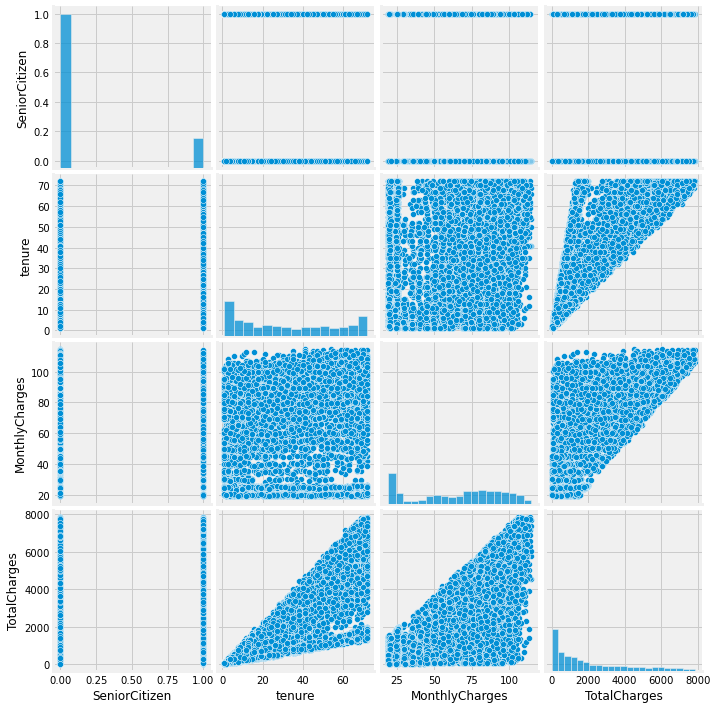

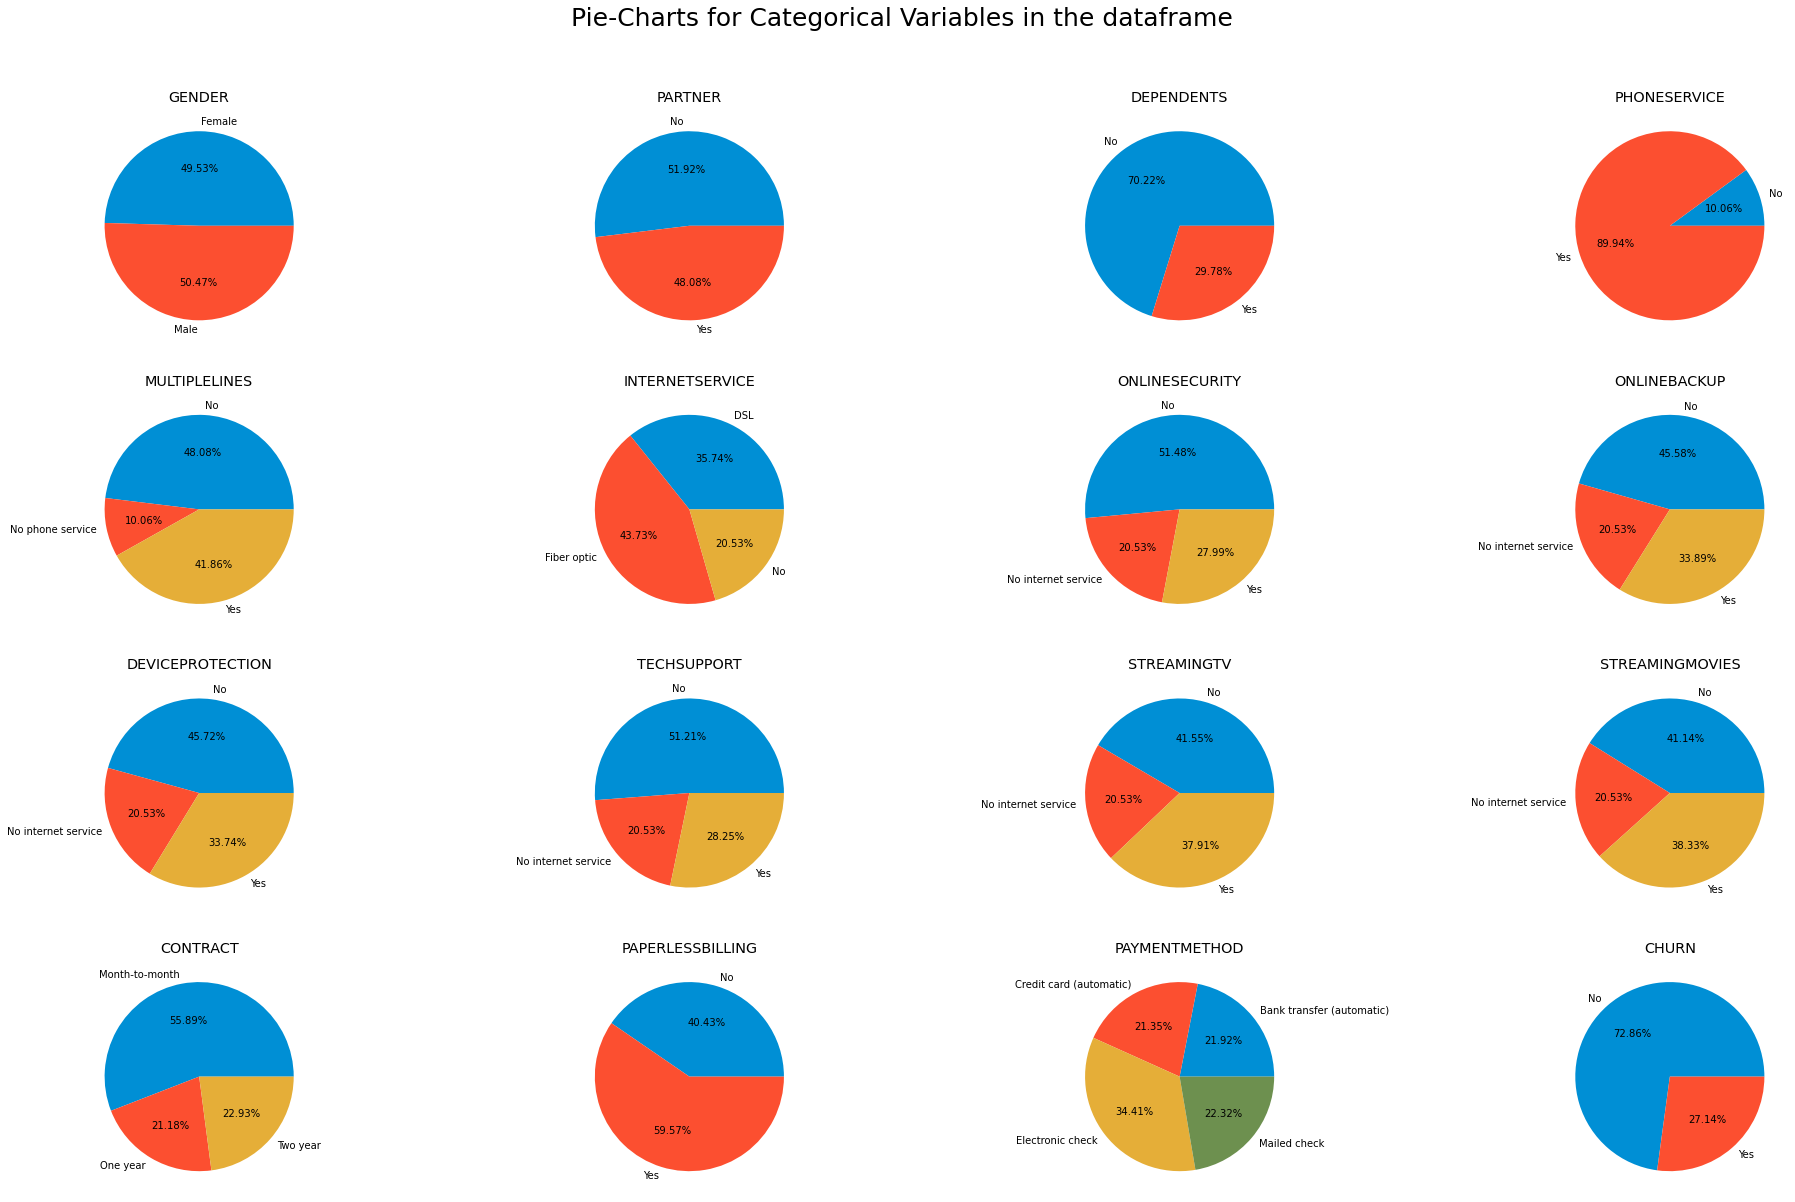

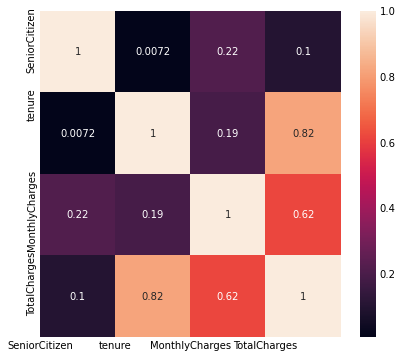

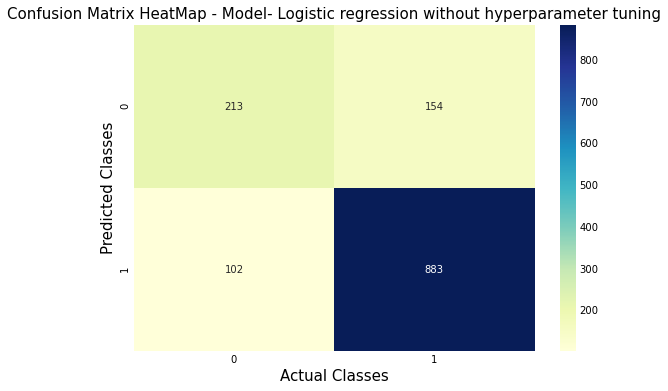

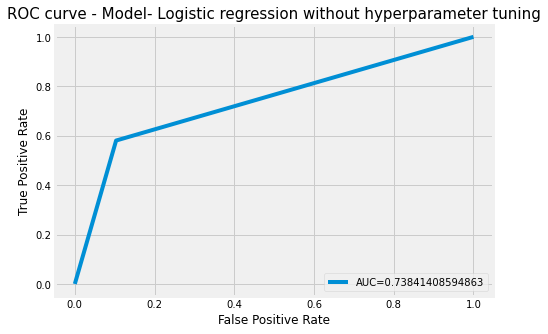

LogisticRegression(C=0.1, n_jobs=-1, random_state=42)
{'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}




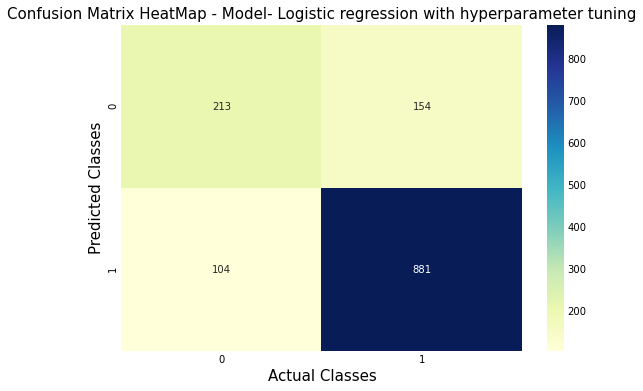

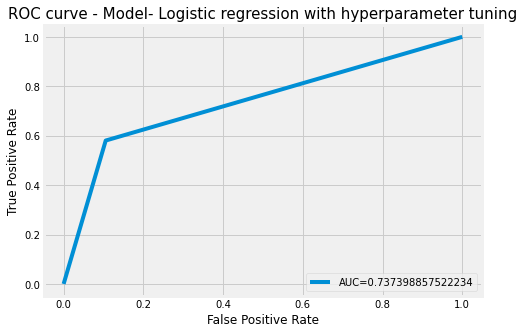

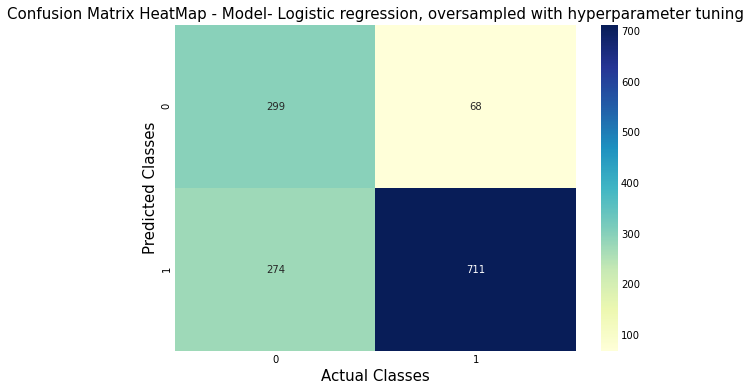

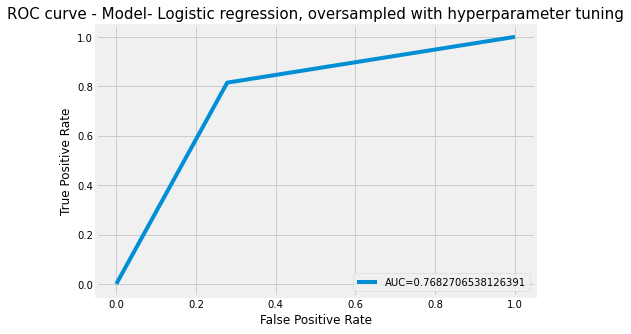

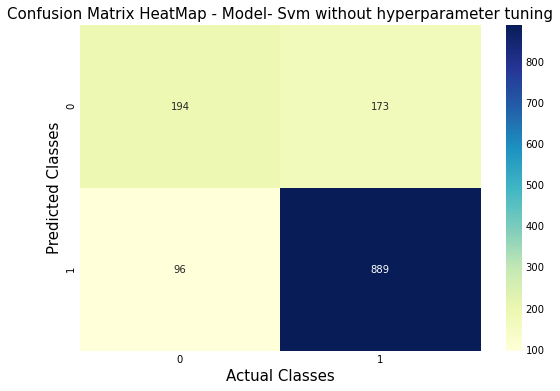

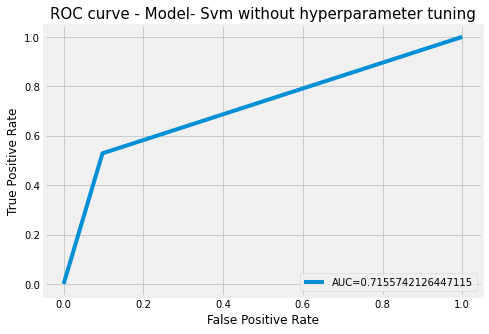

SVC(C=100, class_weight='balanced', gamma=0.1)
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}




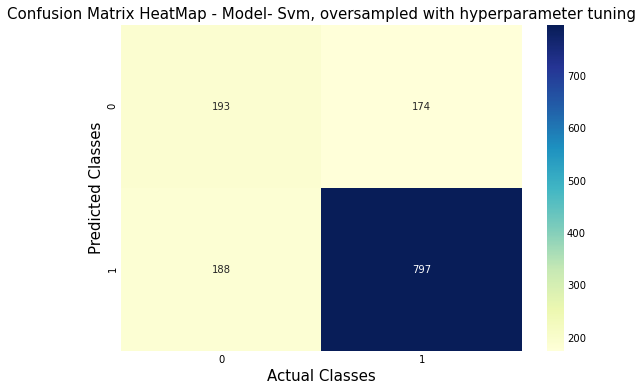

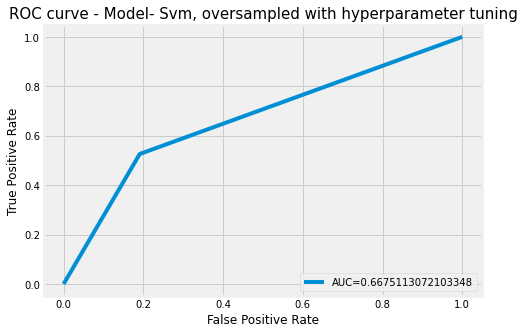

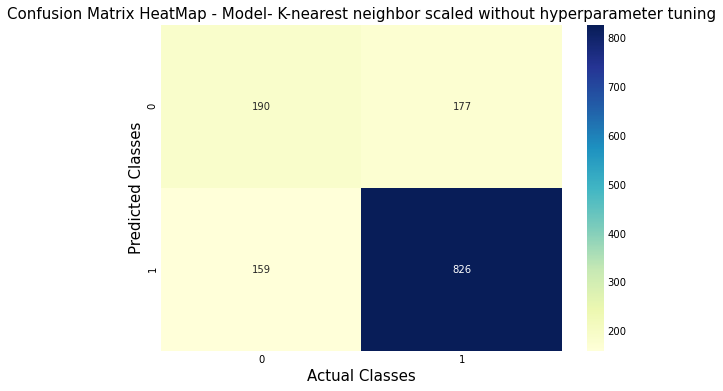

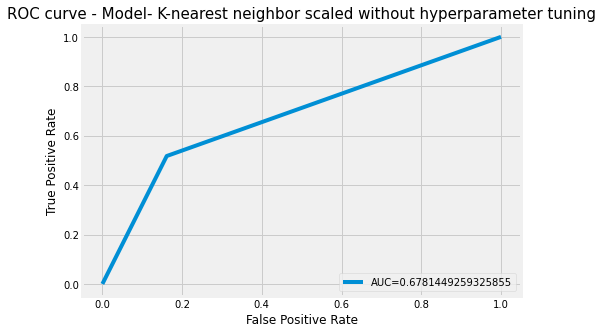

KNeighborsClassifier(n_jobs=-1, weights='distance')
{'n_neighbors': 5, 'weights': 'distance'}




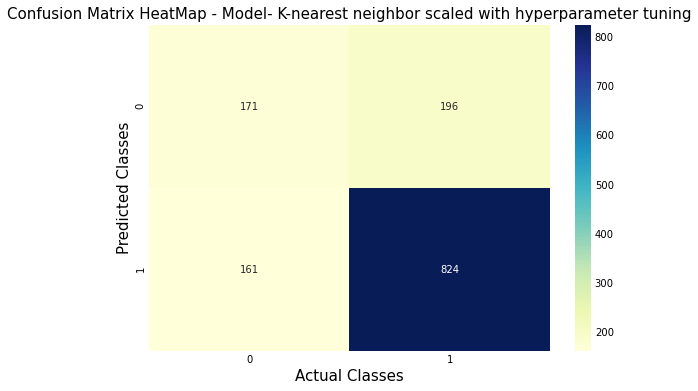

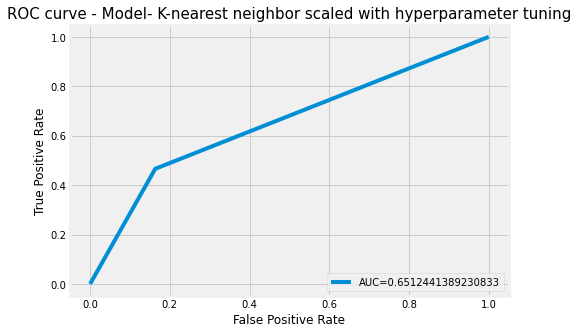

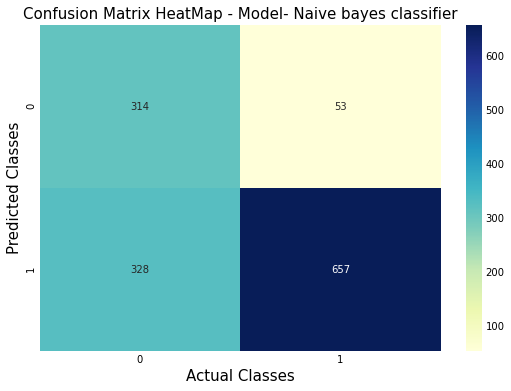

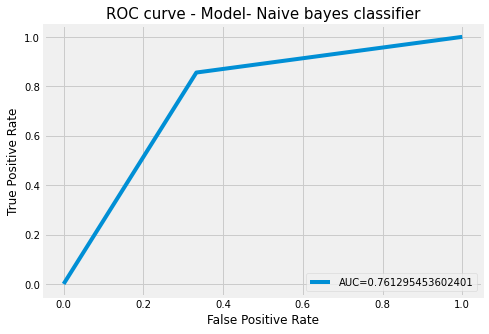

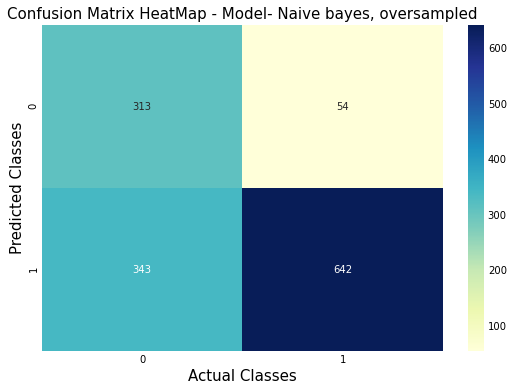

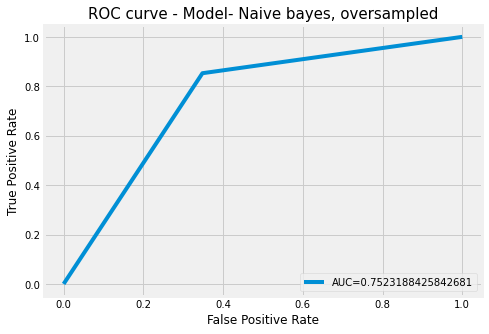

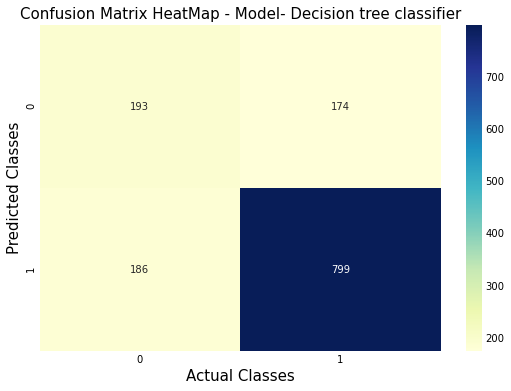

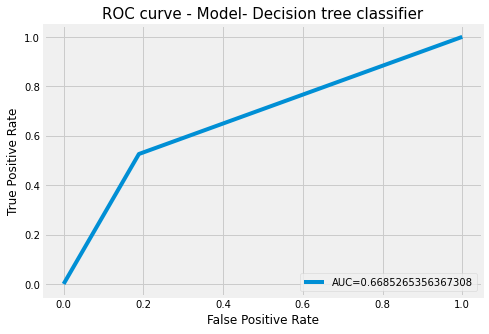

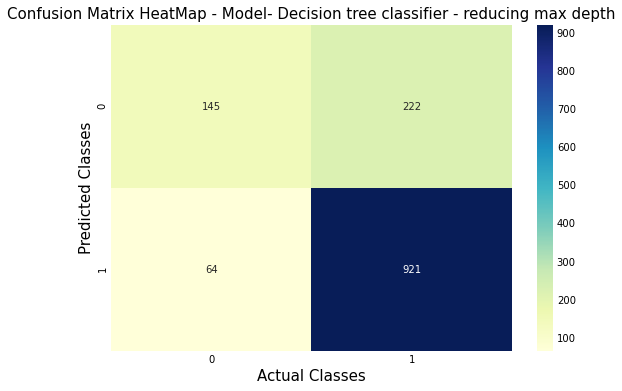

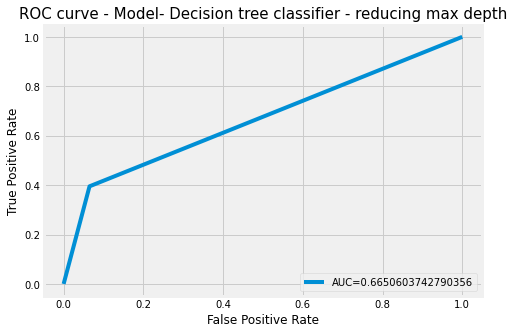

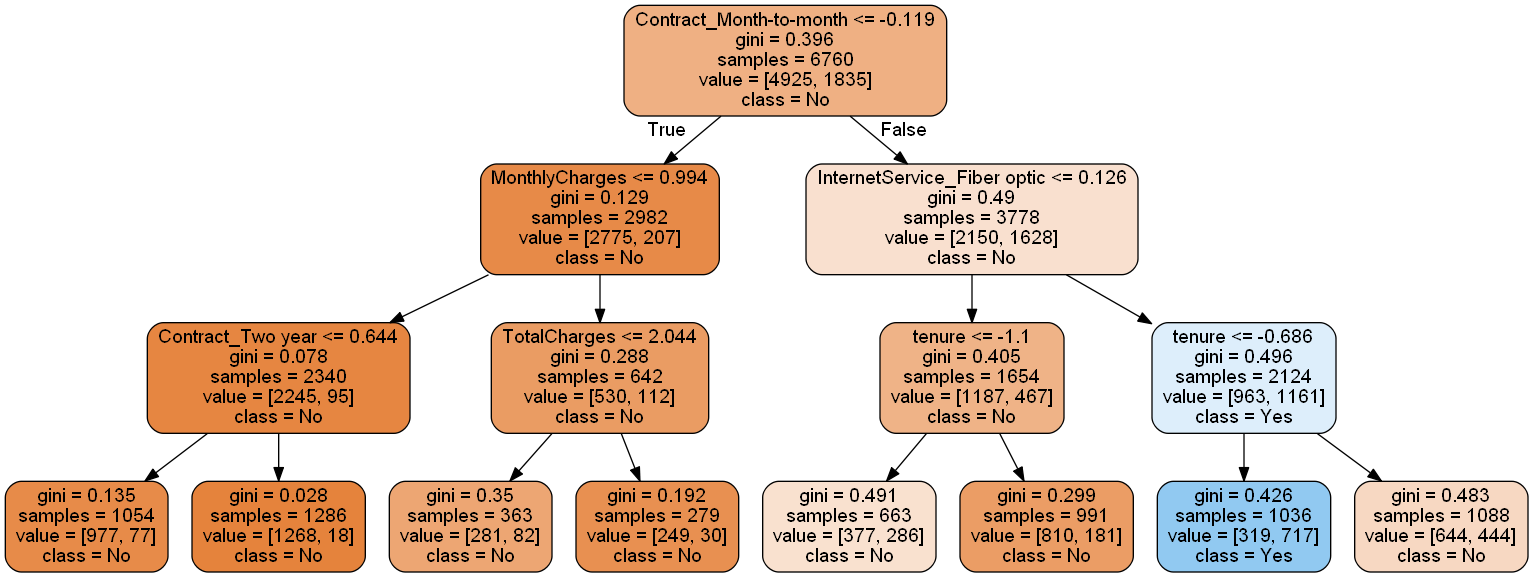

Feature Importance for Decision Tree Classifier 






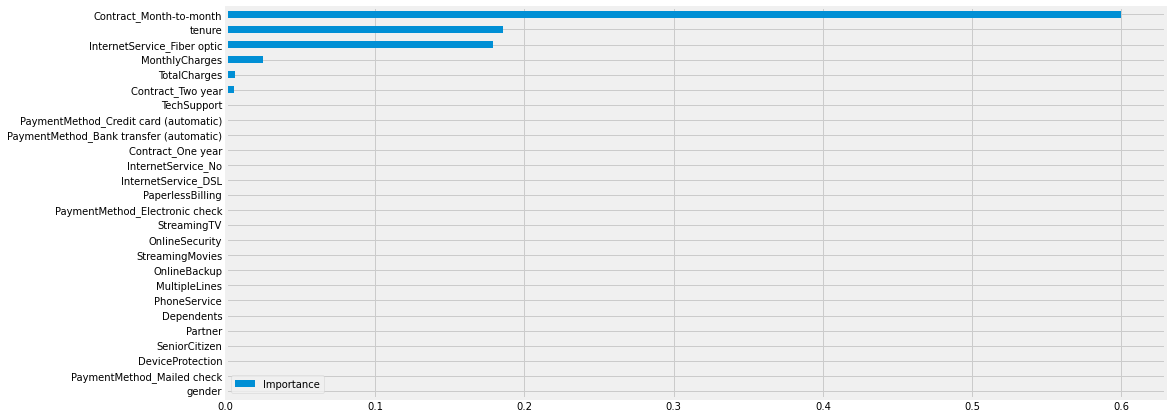

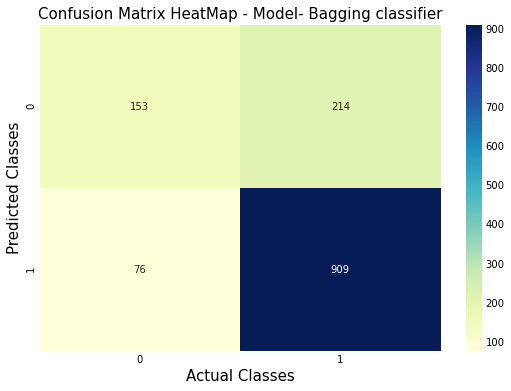

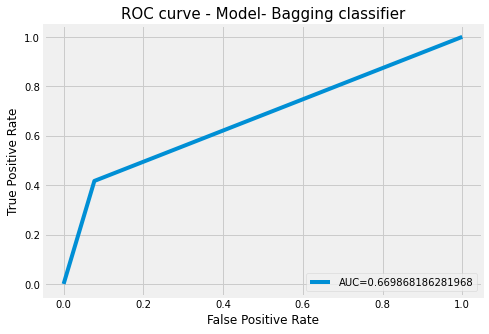

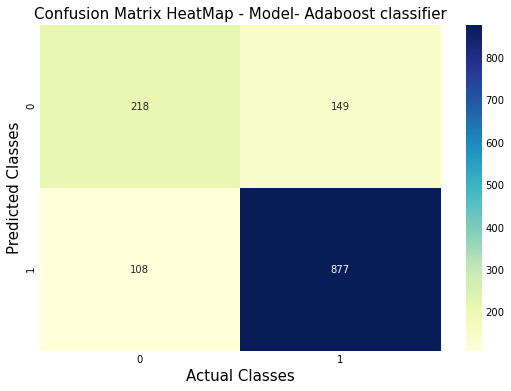

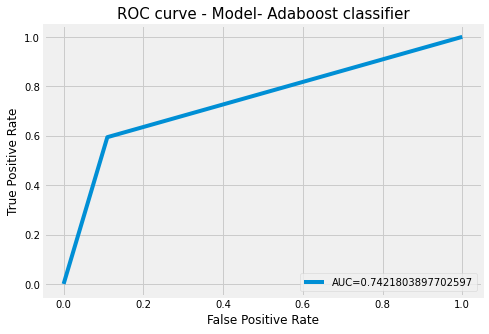

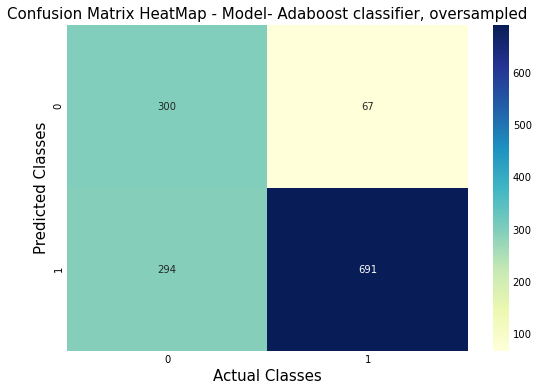

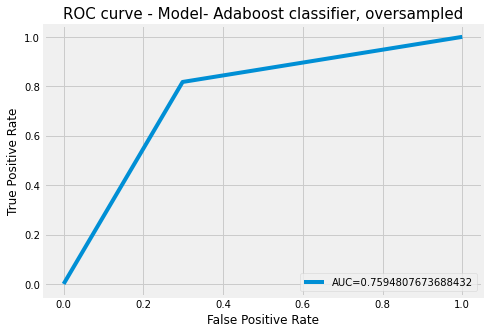

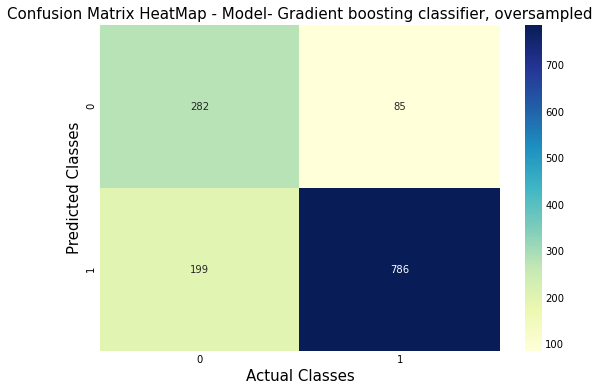

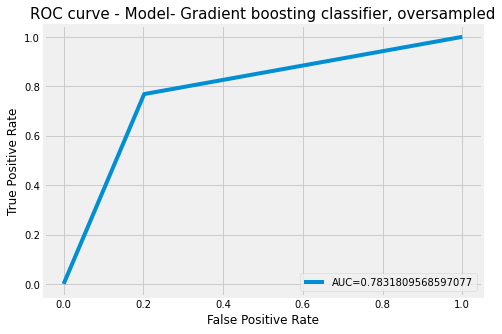

0:	learn: 0.5217086	total: 164ms	remaining: 0us
0:	learn: 0.4899387	total: 1.73ms	remaining: 0us
0:	learn: 0.4935950	total: 1.71ms	remaining: 0us
0:	learn: 0.4853407	total: 1.67ms	remaining: 0us
0:	learn: 0.4831903	total: 1.92ms	remaining: 0us
0:	learn: 0.4807805	total: 1.7ms	remaining: 0us
0:	learn: 0.4765867	total: 1.8ms	remaining: 0us
0:	learn: 0.4823220	total: 2.05ms	remaining: 0us
0:	learn: 0.4782959	total: 1.91ms	remaining: 0us
0:	learn: 0.4873333	total: 1.74ms	remaining: 0us
0:	learn: 0.4847801	total: 1.7ms	remaining: 0us
0:	learn: 0.5194270	total: 3.99ms	remaining: 0us
0:	learn: 0.4875872	total: 1.84ms	remaining: 0us
0:	learn: 0.4858104	total: 2.11ms	remaining: 0us
0:	learn: 0.4891759	total: 1.95ms	remaining: 0us
0:	learn: 0.4860443	total: 1.78ms	remaining: 0us
0:	learn: 0.4887853	total: 1.96ms	remaining: 0us
0:	learn: 0.4854269	total: 2.06ms	remaining: 0us
0:	learn: 0.4871658	total: 1.88ms	remaining: 0us
0:	learn: 0.4900823	total: 1.86ms	remaining: 0us
0:	learn: 0.4848554	tota

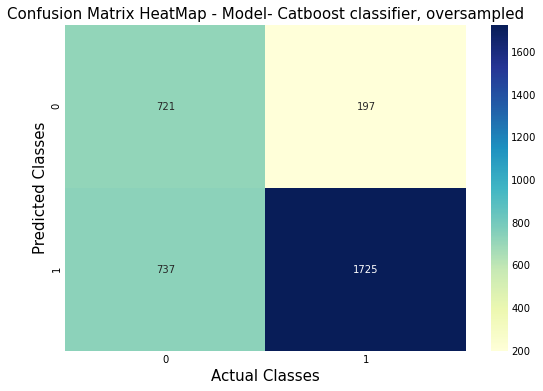

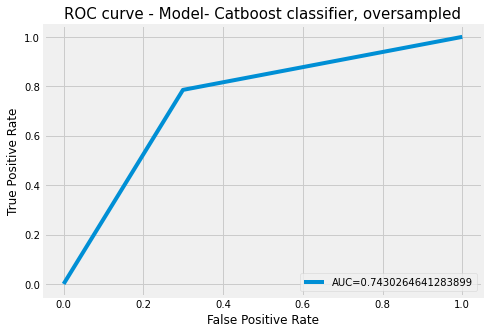

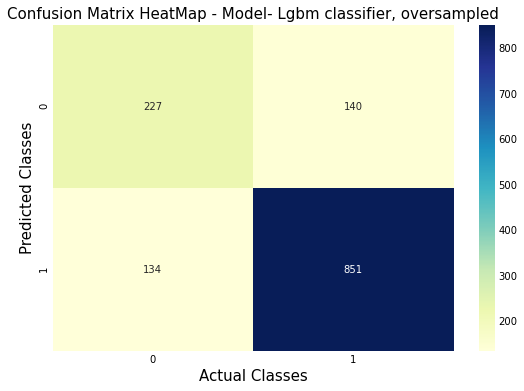

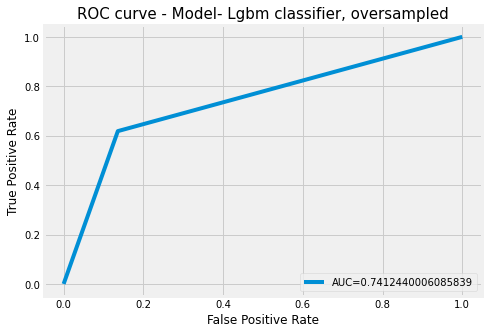

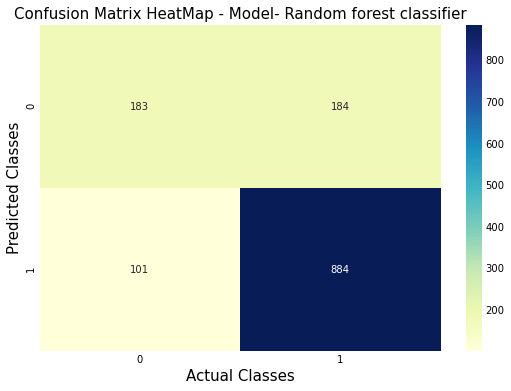

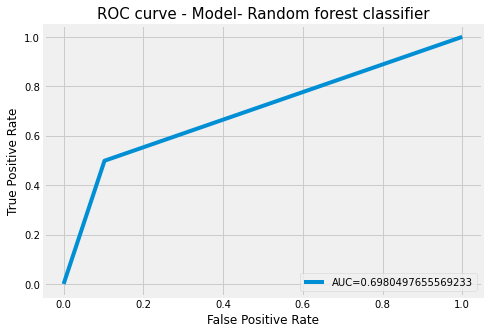

RandomForestClassifier(max_depth=10, n_estimators=75, n_jobs=-1,
                       random_state=42)
{'max_depth': 10, 'n_estimators': 75}




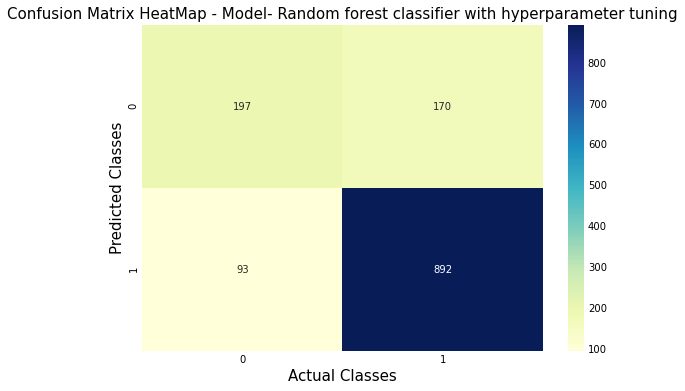

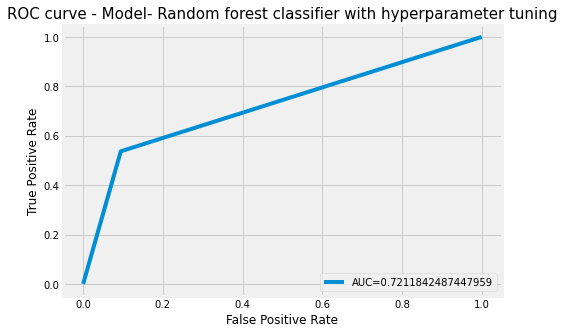

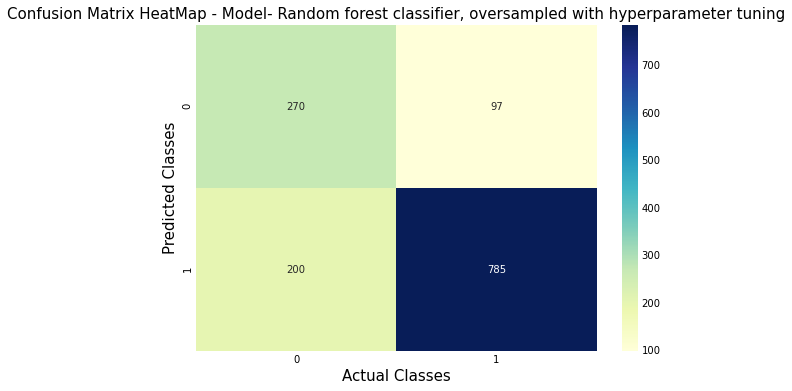

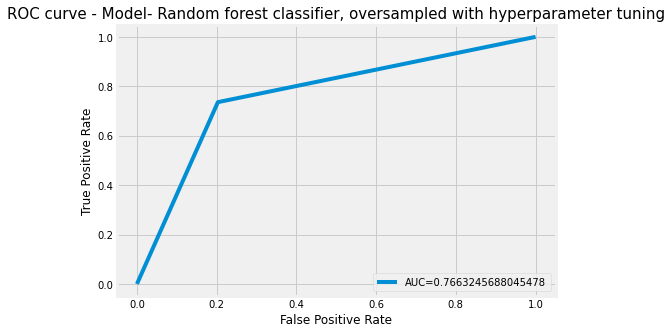

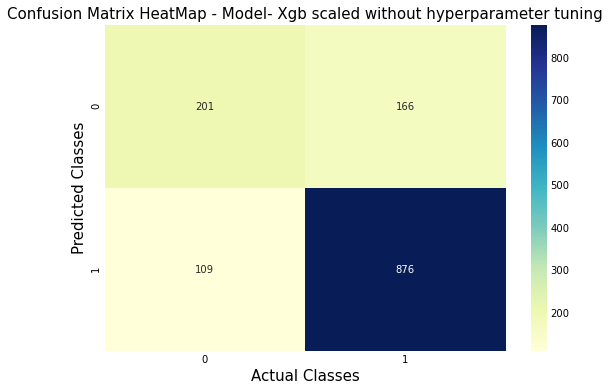

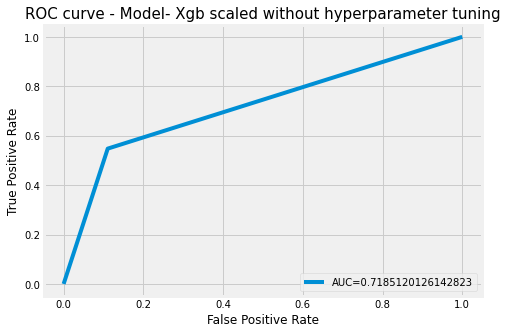

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.11, max_delta_step=0,
              max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=80, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'learning_rate': 0.11, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 80}




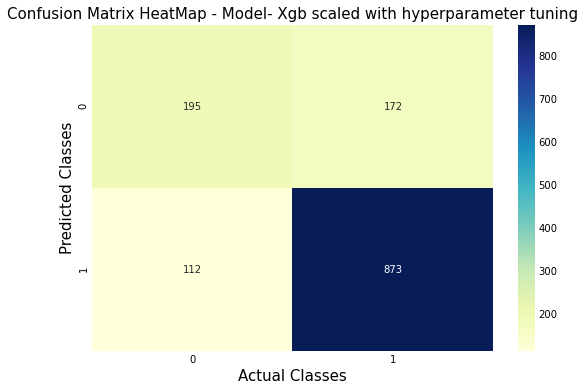

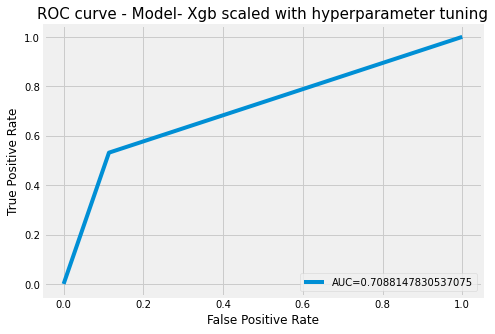

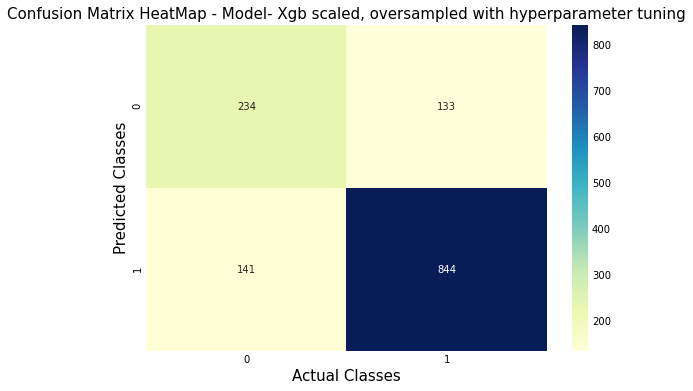

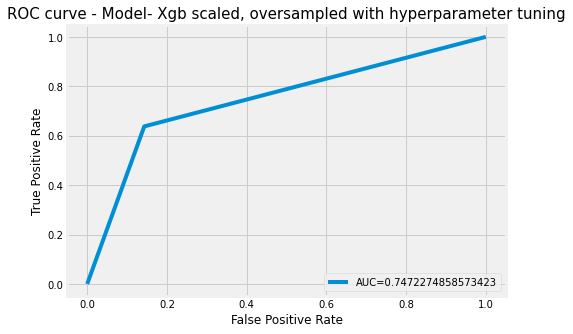

Best Performing Model : LogisticRegression(C=0.1, n_jobs=-1, random_state=42)


Train Score Test Score  \
Logistic Regression, Oversampled With Hyperpara...       0.772      0.749   
Gradient Boosting Classifier, Oversampled                0.842      0.778   
AdaBoost Classifier, Oversampled                         0.775      0.737   
Naive Bayes Classifier                                   0.716      0.717   
Random Forest Classifier, Oversampled With Hype...       0.893      0.772   
Naive Bayes, Oversampled                                 0.752      0.709   
CatBoost Classifier, Oversampled                         0.761      0.715   
LGBM Classifier, Oversampled                             0.908      0.789   
Logistic Regression Without Hyperparameter Tuning        0.804      0.801   
XGB Scaled, oversampled With Hyperparameter Tuning        0.95      0.784   
Logistic Regression With Hyperparameter Tuning           0.802      0.801   
Random Forest Classifier With Hyperparameter Tu...       0.873        0.8   
SVM Without Hyperparameter Tuning                        0.813      0.797   
AdaBoost Classifier                                      0.792      0.792   
XGB Scaled Without Hyperparameter Tuning                 0.944      0.789   
XGB Scaled With Hyperparameter Tuning                    0.949      0.787   
Random Forest Classifier                                 0.999      0.787   
k-Nearest Neighbor Scaled Without Hyperparamete...       0.834      0.757   
SVM, Oversampled With Hyperparameter Tuning              0.962      0.731   
Bagging Classifier                                       0.788      0.786   
k-Nearest Neighbor Scaled With Hyperparameter T...       0.999      0.745   
Decision Tree Classifier                                 0.999      0.728   
Decision Tree Classifier - Reducing Max Depth            0.787      0.785   

                                                   Accuracy Precision Recall  \
Logistic Regression, Oversampled With Hyperpara...     0.75     0.715  0.763   
Gradient Boosting Classifier, Oversampled             0.778     0.729  0.761   
AdaBoost Classifier, Oversampled                      0.736     0.709  0.759   
Naive Bayes Classifier                                0.717     0.701  0.752   
Random Forest Classifier, Oversampled With Hype...    0.772     0.721  0.751   
Naive Bayes, Oversampled                              0.708     0.696  0.747   
CatBoost Classifier, Oversampled                      0.716      0.69  0.738   
LGBM Classifier, Oversampled                          0.788     0.733  0.729   
Logistic Regression Without Hyperparameter Tuning     0.801     0.751  0.727   
XGB Scaled, oversampled With Hyperparameter Tuning    0.784     0.727  0.726   
Logistic Regression With Hyperparameter Tuning        0.801     0.751  0.725   
Random Forest Classifier With Hyperparameter Tu...      0.8      0.75  0.718   
SVM Without Hyperparameter Tuning                     0.797     0.748  0.712   
AdaBoost Classifier                                   0.792      0.74  0.709   
XGB Scaled Without Hyperparameter Tuning              0.789     0.734  0.708   
XGB Scaled With Hyperparameter Tuning                 0.788     0.731  0.707   
Random Forest Classifier                              0.787     0.733  0.697   
k-Nearest Neighbor Scaled Without Hyperparamete...    0.757     0.691  0.681   
SVM, Oversampled With Hyperparameter Tuning           0.731     0.664   0.67   
Bagging Classifier                                    0.786     0.743  0.665   
k-Nearest Neighbor Scaled With Hyperparameter T...    0.745     0.674  0.664   
Decision Tree Classifier                              0.728     0.659  0.663   
Decision Tree Classifier - Reducing Max Depth         0.785     0.745  0.659   

                                                   R2 CV Score RMSE CV Score  \
Logistic Regression, Oversampled With Hyperpara...      -0.023          0.45   
Gradient Boosting Classifier, Oversampled               -0.026          0.45   
AdaBoost Classifier, Oversampled         

In [81]:
# Inputs are Path to the csv source file, target variable in dataset, pickle file name to save the best performing model
# df,Xs,y,pickled_model = Main_Function('path to csv file','target variable name','pickle file name to save the best performing model')

df,Xs,y,pickled_model = Main_Function('TelcomCust.csv','Churn','model.pkl')
df

#where: df - The data frame which contains the metrics for all models
# Xs is the scaled independant variable data
# y is the dependant variable data
# pickled_model is the variable which holds the best performing model

In [82]:
# Function to call pickle model
def pickle_run(pickled_model,Xs,y):
    X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=.30, random_state=1)
    
    pickled_model = pickled_model.fit(X_train, y_train)
    y_predict = pickled_model.predict(X_test)

    pickled_model_score = pickled_model.score(X_train, y_train)
    print('Accuracy Score of Training Data: ', pickled_model_score)


    cfm = confusion_matrix(y_test, y_predict)

    # evaluate accuracy
    pickled_model_score = accuracy_score(y_test, y_predict)
    print('\nAccuracy Score of Test Data:', pickled_model_score)
    print('\nClassification Report of Gradient Boosting Classification Model:\n ', classification_report(y_test, y_predict))
    print('\nMean Absolute Error of Gradient Boosting Classification Model:\n', mean_absolute_error(y_test, y_predict))
    print('\nConfusion Matrix of Gradient Boosting Classification Model:\n', cfm)
    print("\nR2 score:", r2_score(y_test,y_predict, multioutput='variance_weighted'))

    #visualization of confusion matrix in the form of a heatmap
    plt.figure(figsize = (8, 6))
    sns.heatmap(cfm, annot = True, cmap = 'YlGnBu', fmt = 'd')
    plt.xlabel('Actual Classes', fontsize = 15)
    plt.ylabel('Predicted Classes', fontsize = 15)
    plt.title('Confusion Matrix HeatMap of Model', fontsize = 15)
    
    # Calculate the AUC
    fpr, tpr, _ = roc_curve(y_test,  y_predict)
    auc_obt = roc_auc_score(y_test, y_predict)

    #create ROC curve

    plt.figure(figsize = (7,5))
    plt.plot(fpr,tpr,label="AUC="+str(auc_obt))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC curve - Best Performing Model', fontsize = 15)
    plt.legend(loc=4)
    plt.show()

### To use the best performing model for next set of data

Accuracy Score of Training Data:  0.7994505494505495

Accuracy Score of Test Data: 0.8067061143984221

Classification Report of Gradient Boosting Classification Model:
                precision    recall  f1-score   support

           0       0.85      0.90      0.87      1502
           1       0.65      0.55      0.60       526

    accuracy                           0.81      2028
   macro avg       0.75      0.72      0.74      2028
weighted avg       0.80      0.81      0.80      2028


Mean Absolute Error of Gradient Boosting Classification Model:
 0.1932938856015779

Confusion Matrix of Gradient Boosting Classification Model:
 [[1345  157]
 [ 235  291]]

R2 score: -0.0062325011518227225


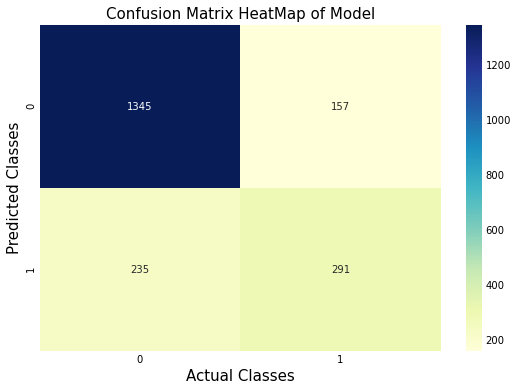

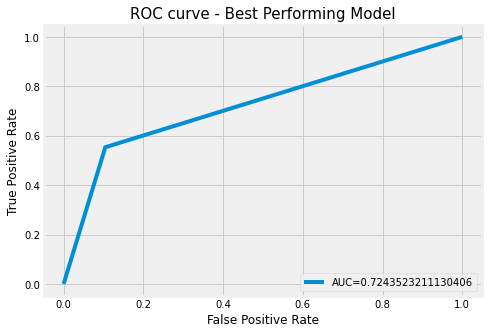

In [83]:
pickle_run(pickled_model,Xs,y)

### Model Evaluation

In [84]:
#Printing the dataframe with all metrics for all the models
df.drop('model', axis = 1)

Train Score Test Score  \
Logistic Regression, Oversampled With Hyperpara...       0.772      0.749   
Gradient Boosting Classifier, Oversampled                0.842      0.778   
AdaBoost Classifier, Oversampled                         0.775      0.737   
Naive Bayes Classifier                                   0.716      0.717   
Random Forest Classifier, Oversampled With Hype...       0.893      0.772   
Naive Bayes, Oversampled                                 0.752      0.709   
CatBoost Classifier, Oversampled                         0.761      0.715   
LGBM Classifier, Oversampled                             0.908      0.789   
Logistic Regression Without Hyperparameter Tuning        0.804      0.801   
XGB Scaled, oversampled With Hyperparameter Tuning        0.95      0.784   
Logistic Regression With Hyperparameter Tuning           0.802      0.801   
Random Forest Classifier With Hyperparameter Tu...       0.873        0.8   
SVM Without Hyperparameter Tuning                        0.813      0.797   
AdaBoost Classifier                                      0.792      0.792   
XGB Scaled Without Hyperparameter Tuning                 0.944      0.789   
XGB Scaled With Hyperparameter Tuning                    0.949      0.787   
Random Forest Classifier                                 0.999      0.787   
k-Nearest Neighbor Scaled Without Hyperparamete...       0.834      0.757   
SVM, Oversampled With Hyperparameter Tuning              0.962      0.731   
Bagging Classifier                                       0.788      0.786   
k-Nearest Neighbor Scaled With Hyperparameter T...       0.999      0.745   
Decision Tree Classifier                                 0.999      0.728   
Decision Tree Classifier - Reducing Max Depth            0.787      0.785   

                                                   Accuracy Precision Recall  \
Logistic Regression, Oversampled With Hyperpara...     0.75     0.715  0.763   
Gradient Boosting Classifier, Oversampled             0.778     0.729  0.761   
AdaBoost Classifier, Oversampled                      0.736     0.709  0.759   
Naive Bayes Classifier                                0.717     0.701  0.752   
Random Forest Classifier, Oversampled With Hype...    0.772     0.721  0.751   
Naive Bayes, Oversampled                              0.708     0.696  0.747   
CatBoost Classifier, Oversampled                      0.716      0.69  0.738   
LGBM Classifier, Oversampled                          0.788     0.733  0.729   
Logistic Regression Without Hyperparameter Tuning     0.801     0.751  0.727   
XGB Scaled, oversampled With Hyperparameter Tuning    0.784     0.727  0.726   
Logistic Regression With Hyperparameter Tuning        0.801     0.751  0.725   
Random Forest Classifier With Hyperparameter Tu...      0.8      0.75  0.718   
SVM Without Hyperparameter Tuning                     0.797     0.748  0.712   
AdaBoost Classifier                                   0.792      0.74  0.709   
XGB Scaled Without Hyperparameter Tuning              0.789     0.734  0.708   
XGB Scaled With Hyperparameter Tuning                 0.788     0.731  0.707   
Random Forest Classifier                              0.787     0.733  0.697   
k-Nearest Neighbor Scaled Without Hyperparamete...    0.757     0.691  0.681   
SVM, Oversampled With Hyperparameter Tuning           0.731     0.664   0.67   
Bagging Classifier                                    0.786     0.743  0.665   
k-Nearest Neighbor Scaled With Hyperparameter T...    0.745     0.674  0.664   
Decision Tree Classifier                              0.728     0.659  0.663   
Decision Tree Classifier - Reducing Max Depth         0.785     0.745  0.659   

                                                   R2 CV Score RMSE CV Score  \
Logistic Regression, Oversampled With Hyperpara...      -0.023          0.45   
Gradient Boosting Classifier, Oversampled               -0.026          0.45   
AdaBoost Classifier, Oversampled         

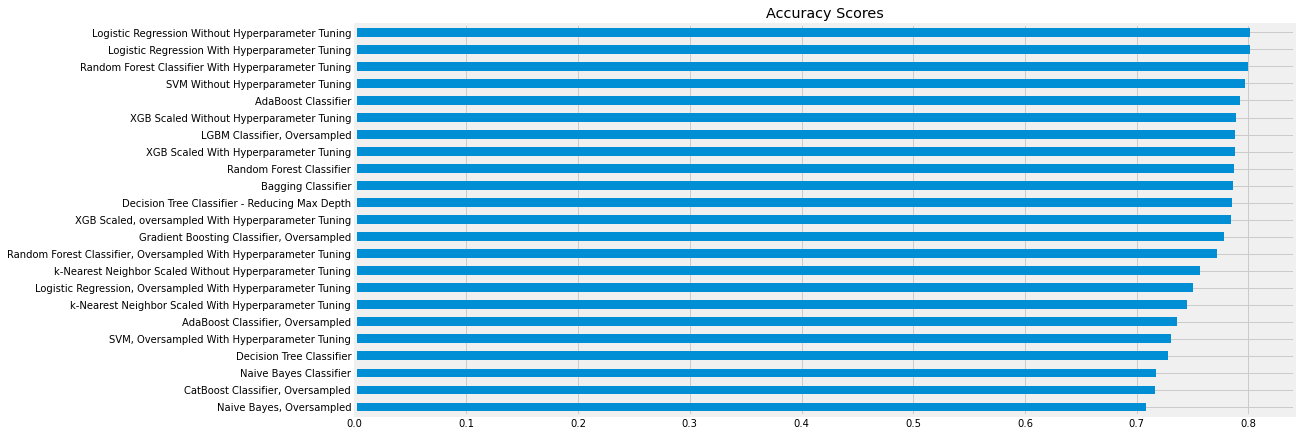

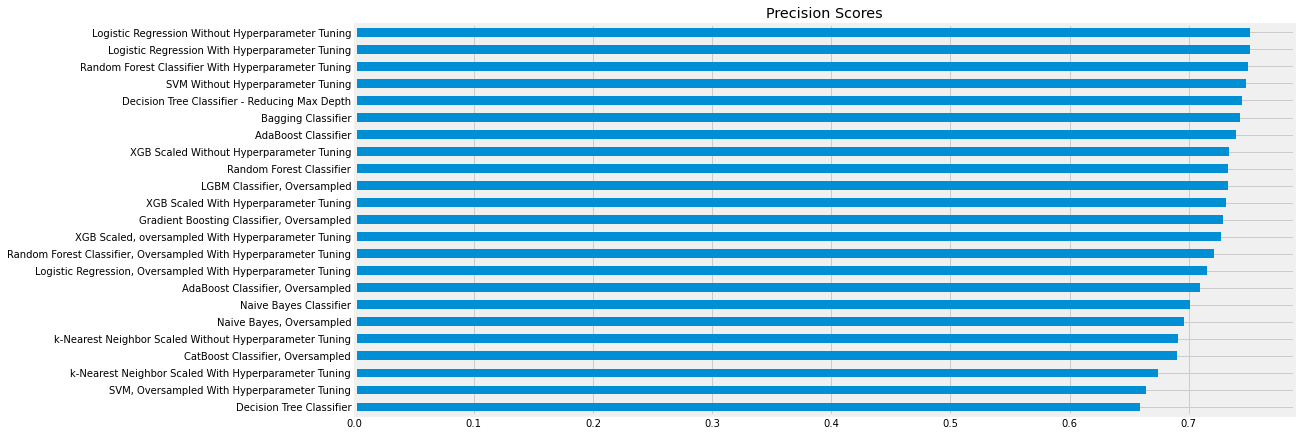

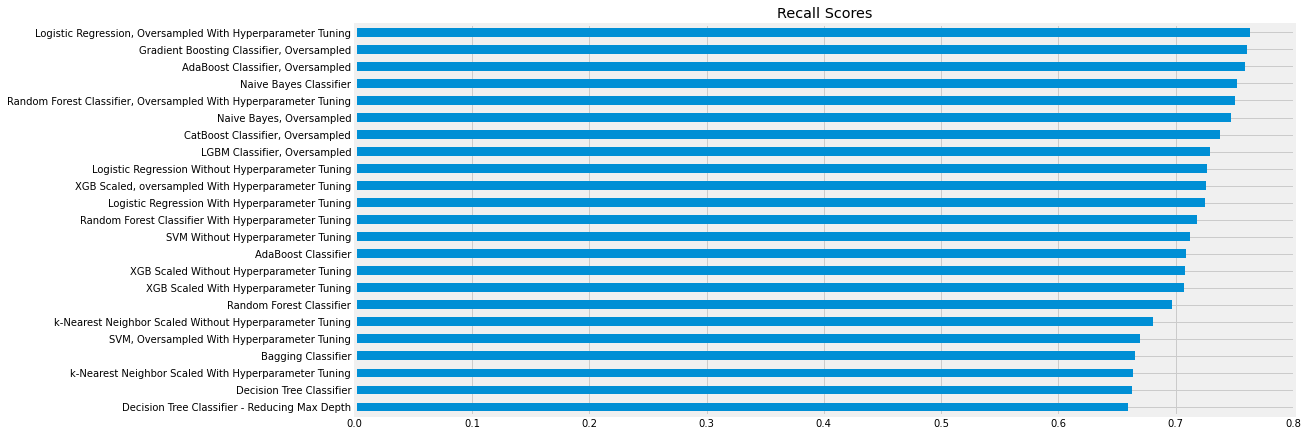

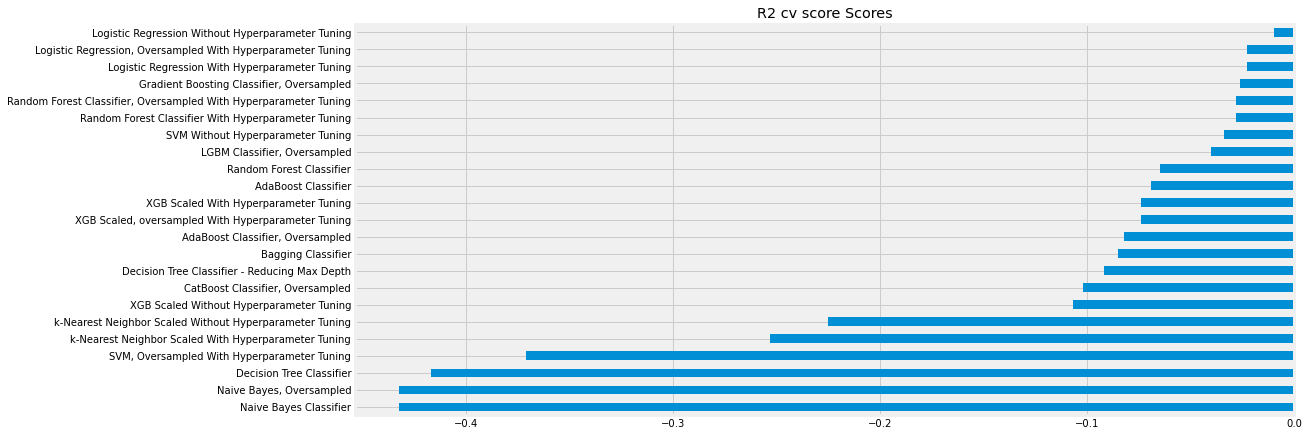

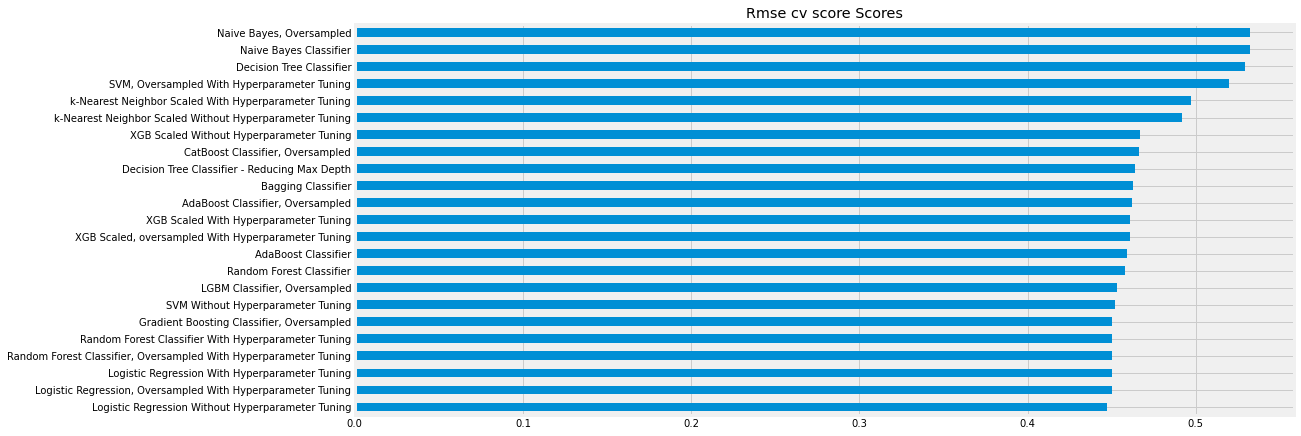

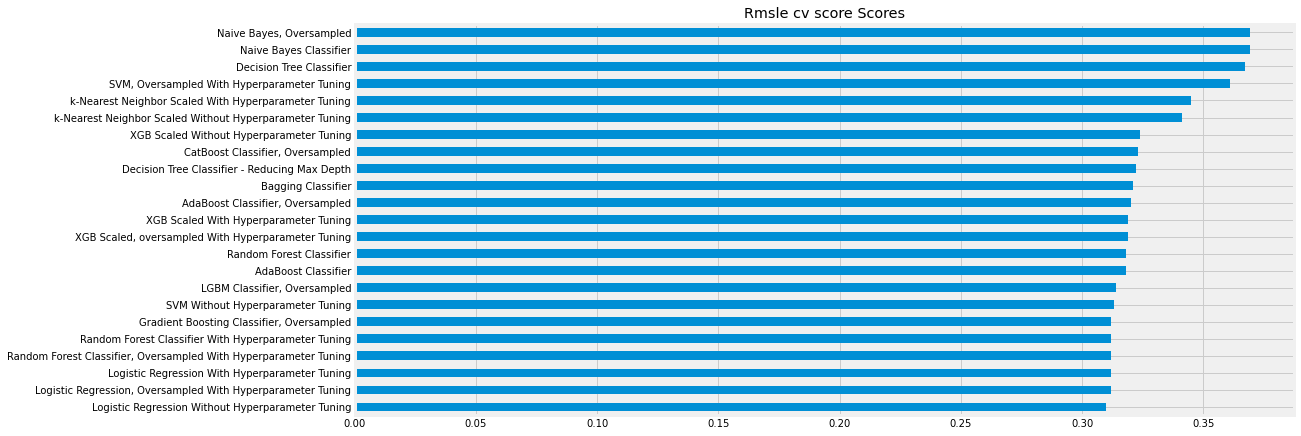

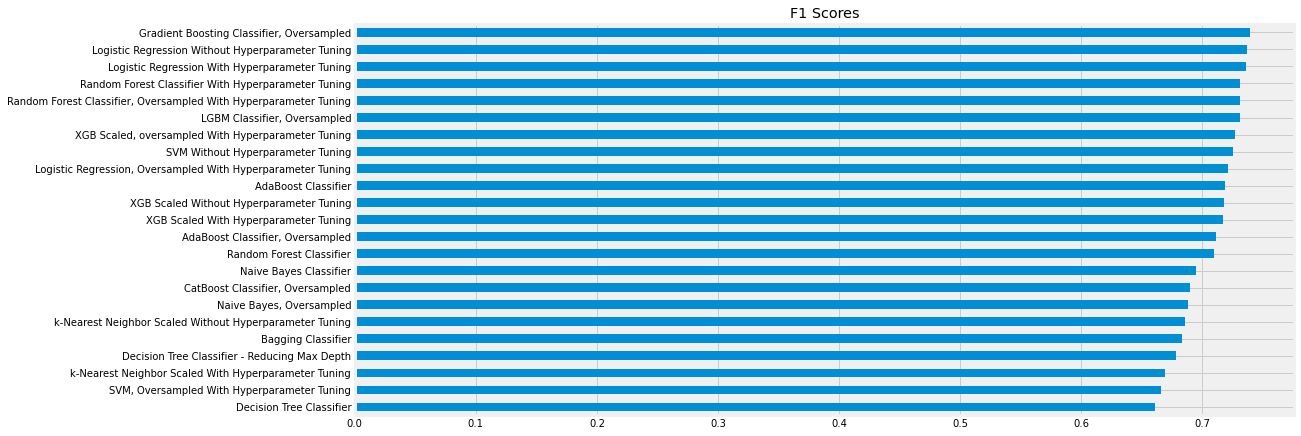

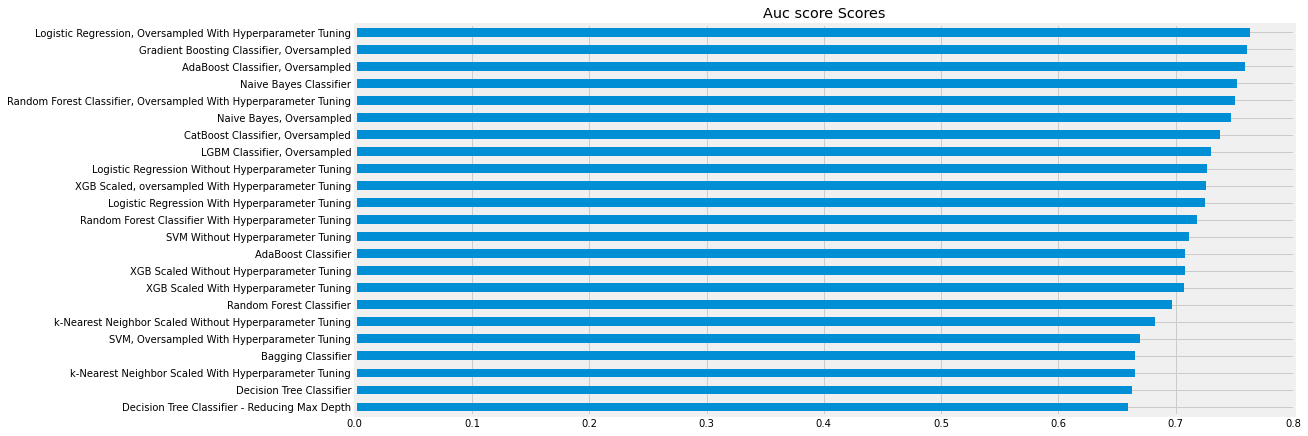

In [85]:
# Metrics represented in scale for all models
columns = ['Accuracy', 'Precision', 'Recall', 'R2 CV Score', 'RMSE CV Score', 'RMSLE CV Score', 'f1', 'AUC Score']
for i, types in enumerate(columns):
    temp = df[types]
    plt.figure(i, figsize = (15, 7.2))
    temp.sort_values(ascending = True).plot(kind = 'barh')
    plt.title(f'{types.capitalize()} Scores')
    plt.show()

<a id='conclusion'></a>
### Conclusion

The classification goal is to predict the potential customers who have a higher probability to churn. 

Most of the ML models works best when the number of classes are in equal proportion since they are designed to maximize accuracy and reduce error. Thus, they do not take into account the class distribution / proportion or balance of classes. In our dataset, the potential customers who have a higher probability to churn (chrun 'yes' i.e. 1) is 26.5% whereas those about 73.5% of the customers didn't churn (Chrun 'no' i.e. 0).

In this cases, important performance measures such as precision, recall, and f1-score would be helpful. We can also calculate this metrics for the minority, positive, class.

* **Precision**: When it predicts the positive result, how often is it correct? i.e. limit the number of false positives.
* **Recall**: When it is actually the positive result, how often does it predict correctly? i.e. limit the number of false negatives.
* **f1-score**: Harmonic mean of precision and recall.

The confusion matrix for class 1 (Churn) would look like:

|                        | Predicted: 0 (Not Chrun) | Predicted: 1 (Churn)|
|------------------------|-----------------------------|------------------------|
|**Actual: 0 (Not Subscribed)**| True Negatives              | False Positives        |
|**Actual: 1 (Subscribed)**    | False Negatives             | True Positives         |

* **Precision would tell us cases where actually the Customer hadn't chrun but we predicted it as chrun.**
* **Recall would tell us cases where actually the Customer had chrun but we predicted it as didn't chrun.**

In our case, it would be recall that would hold more importance then precision. So <span class="mark">choosing recall particularly for class 1 and accuracy as as evaluation metric. Also important would be how is model behaving over the training and test scores across the cross validation sets.</span>

**Modeling** was sub-divided in two phases, in the first phase we applied standard models (with and without the hyperparameter tuning wherever applicable) such as <span class="girk">Logistic Regression, k-Nearest Neighbor and Naive Bayes classifiers</span>. In second phase apply ensemble techniques such as <span class="girk">Decision Tree, Bagging, AdaBoost, Gradient Boosting and Random Forest classifiers</span>. Oversampling the ones with higher accuracy and better recall for subscribe.

**Oversampling**, which is one of common ways to tackle the issue of imbalanced data. Over-sampling refers to various methods that aim to increase the number of instances from the underrepresented class in the data set. Out of the various methods, we chose Synthetic Minority Over-Sampling Technique (SMOTE). SMOTE’s main advantage compared to traditional random naive over-sampling is that by creating synthetic observations instead of reusing existing observations, classifier is less likely to overfit.

**In the first phase (Standard machine learning models)**,
* Best recall for minority class in Logistic Regression of 76.3%
* However better accuracy of 80.1% was observed in logistic regression with hyperparameter tuning
* <span class="mark">Oversampling both, recall of Naive Bayes increases but accuracy drops significantly whereas oversampled logistic regression with hyperparameter tuned model out of which we found a significant improvement of 76.3% in the recall for subscribe against the baseline model, however the accuracy dropped by 1.8%. But again, it's recall that's more important here.</span>
* Logistic regression is the best method in this case because the dependant variable Churn is binary. 
* SVM is suitable in cases where the number of features and number of training data is very large(in millions) 
(or) when the sparsity in the problem is very high - which is not the case here.
* KNN is best suitable for multiclass classification. That is if the data contains more than two lables or categories then KNN can be the suitable algorithm. In our case we only have a dependant variable "Chrun" with only 2 possible values either 0 or 1.
* <span class="mark">Thus, this is the reason for Logistic regression giving better recall than the other models.

**In the second phase (Ensemble models)**,
* Decision tree classifier gives the best recall score for chrun class but is also prone to overfitting across the cross validation set. Reducing the max depth did solve the problem of overfitting, but resulted in lower recall.
* Gradient Boosting classifier gave the best recall when compared with decision tree reduced max depth, bagging and gradient boosting classifier. Thus, oversampled that which gave a recall of 76.8% for chrun (yes) class. Best till now among ensembles.
* Tried different methods with random forest i.e. hyperparameter tuning, oversampling and even reducing max depth.. but recall score didn't improve when compared with AdaBoost classifier when oversampled.
* <span class="mark">Thus two better models from this phase are AdaBoost classifier when oversampled with a recall of 75.9%, accuracy of 73.7% and Gradient Boosting classifier when hyperparameter tuned and oversampled, max depth reduced with recall of 76.1% and accuracy of 77.8%</span>